## About the Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

#### 1. Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings as wrn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


wrn.filterwarnings('ignore')

#### 2. Load the data

In [2]:
breastData = pd.read_csv('data.csv',sep=',',encoding='ISO-8859-1')

#### 3. Check the dataset

In [3]:
breastData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breastData.shape

(569, 33)

In [5]:
len(breastData)

569

In [6]:
breastData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

#### Check the Nulls

In [7]:
breastData.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<b> There is only one column which has all Null values, we can drop the same </b>

In [8]:
## Drop the column containing only Nulls | Start
breastData = breastData.drop('Unnamed: 32',axis=1)
## Drop the column containing only Nulls | End

In [9]:
breastData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
round(breastData.diagnosis.value_counts()/len(breastData)*100,2)

B    62.74
M    37.26
Name: diagnosis, dtype: float64

We can see that 62.7% were diagnosed as 'Benign' whereas 37.2% are Malignant 

In [11]:
# Get the boxplots to check outliers | Start 
def getBoxplots(df):
    for cols in df.columns:
        if(df[cols].dtype=='float64'):
            plt.figure(figsize=(15,20))
            sns.set(style="darkgrid")
            sns.boxplot(df[cols])
            plt.title(cols)
            plt.show()

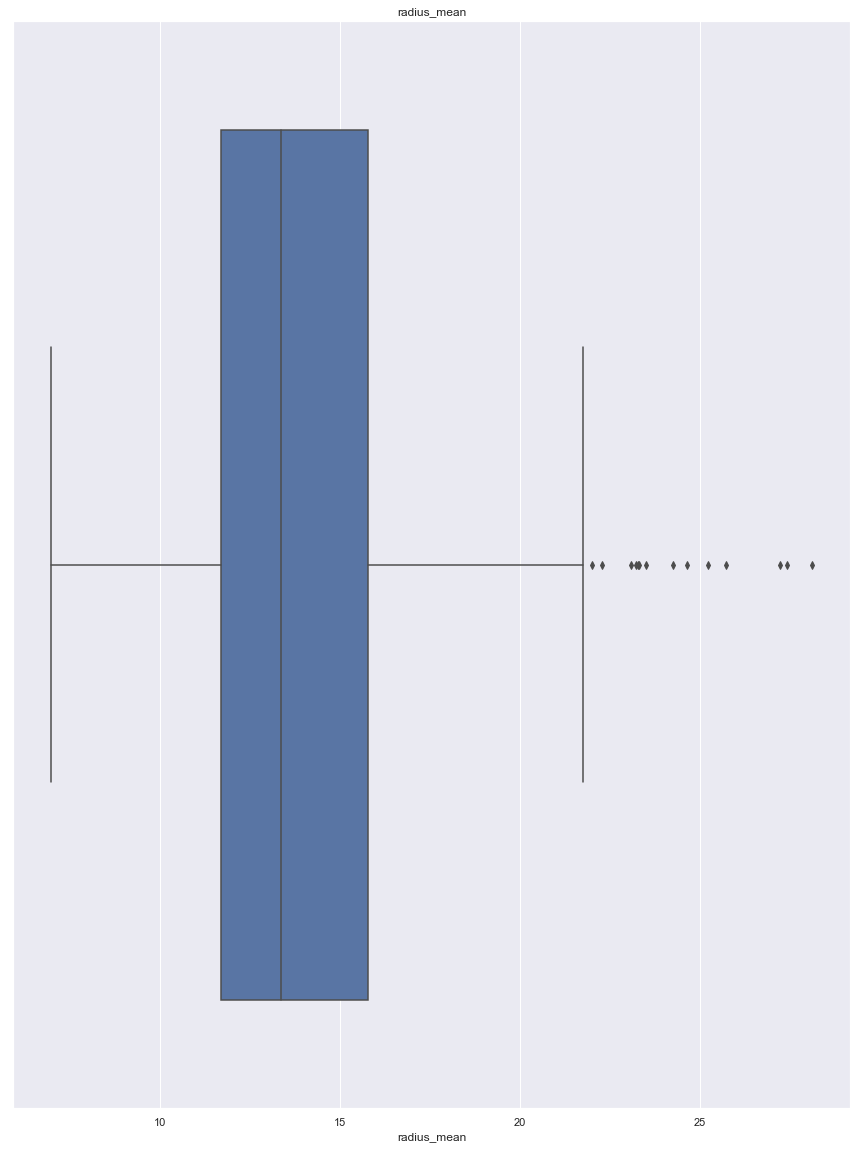

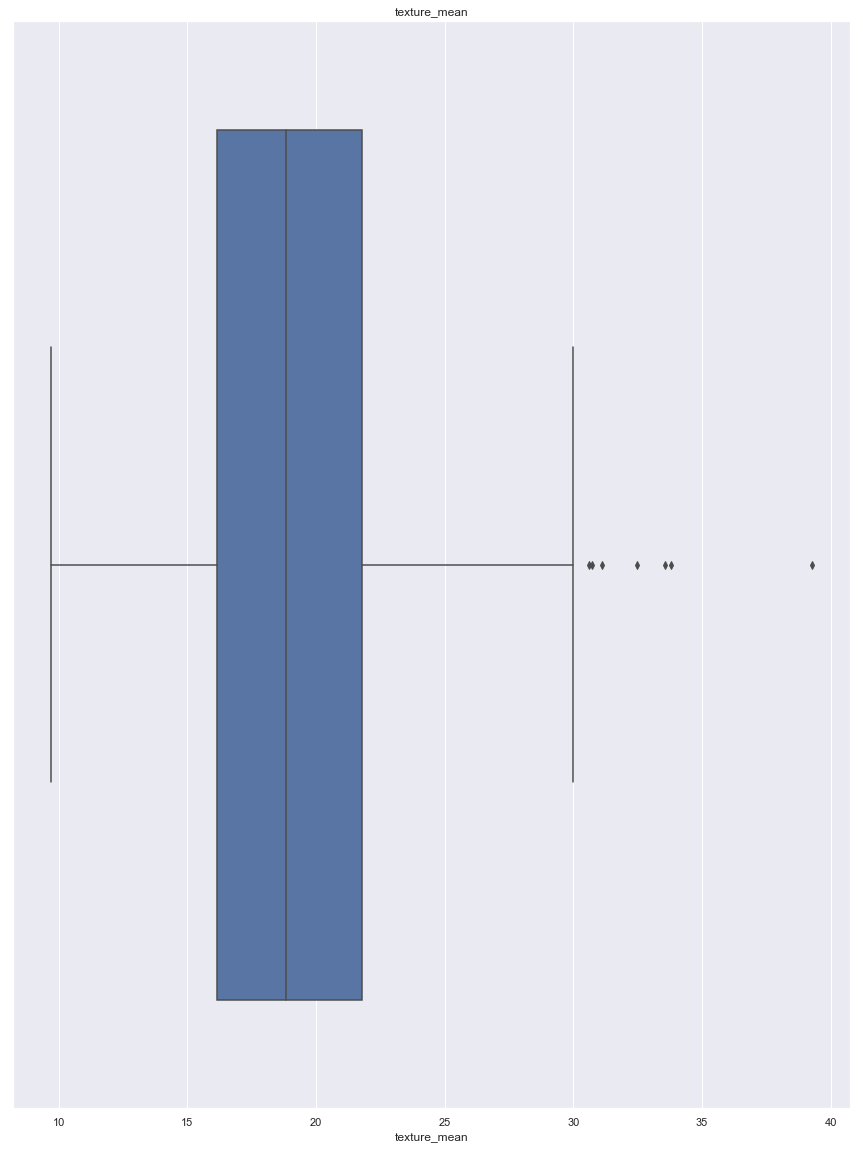

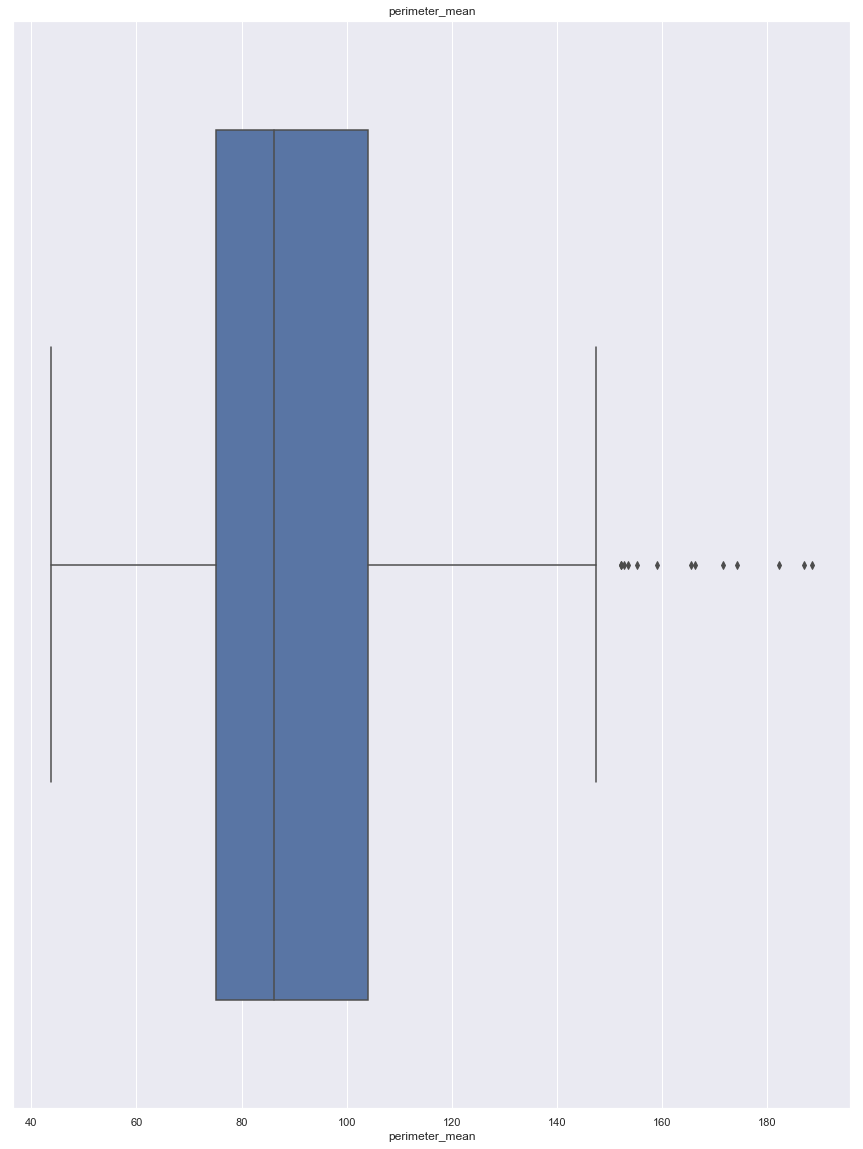

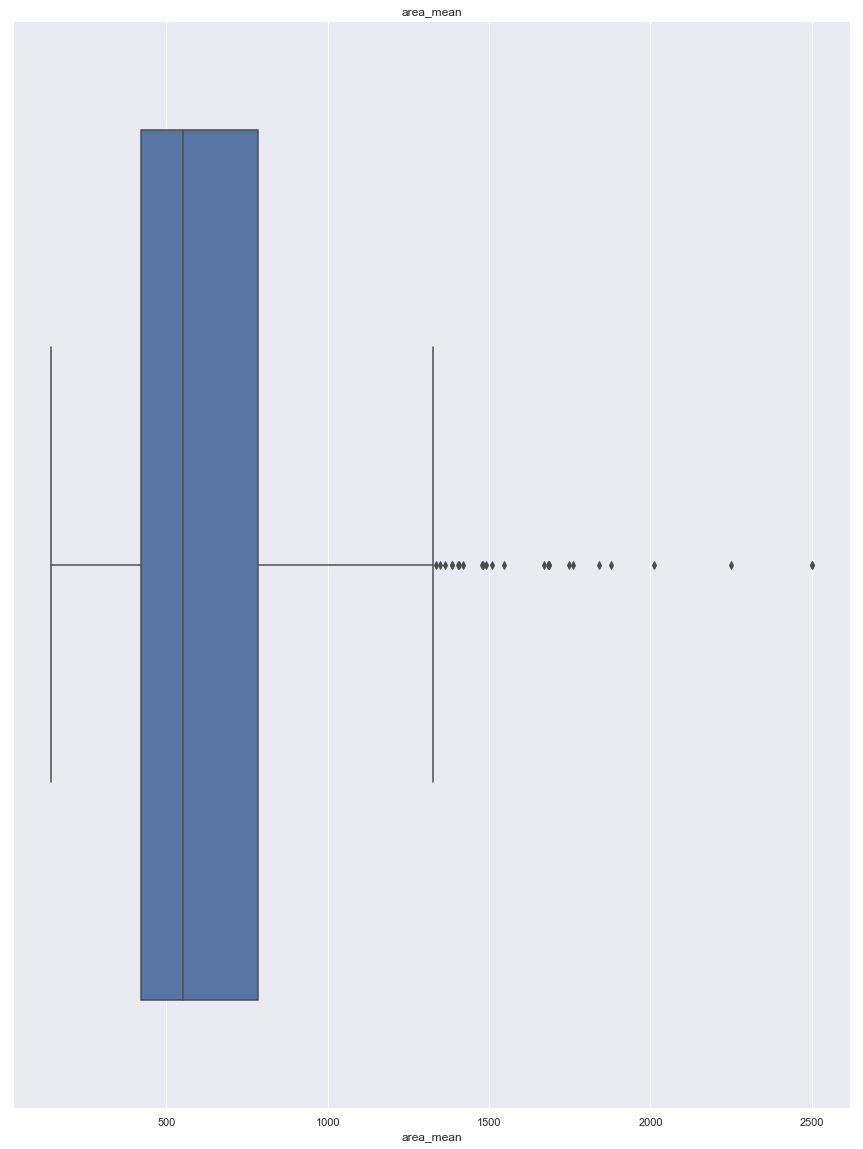

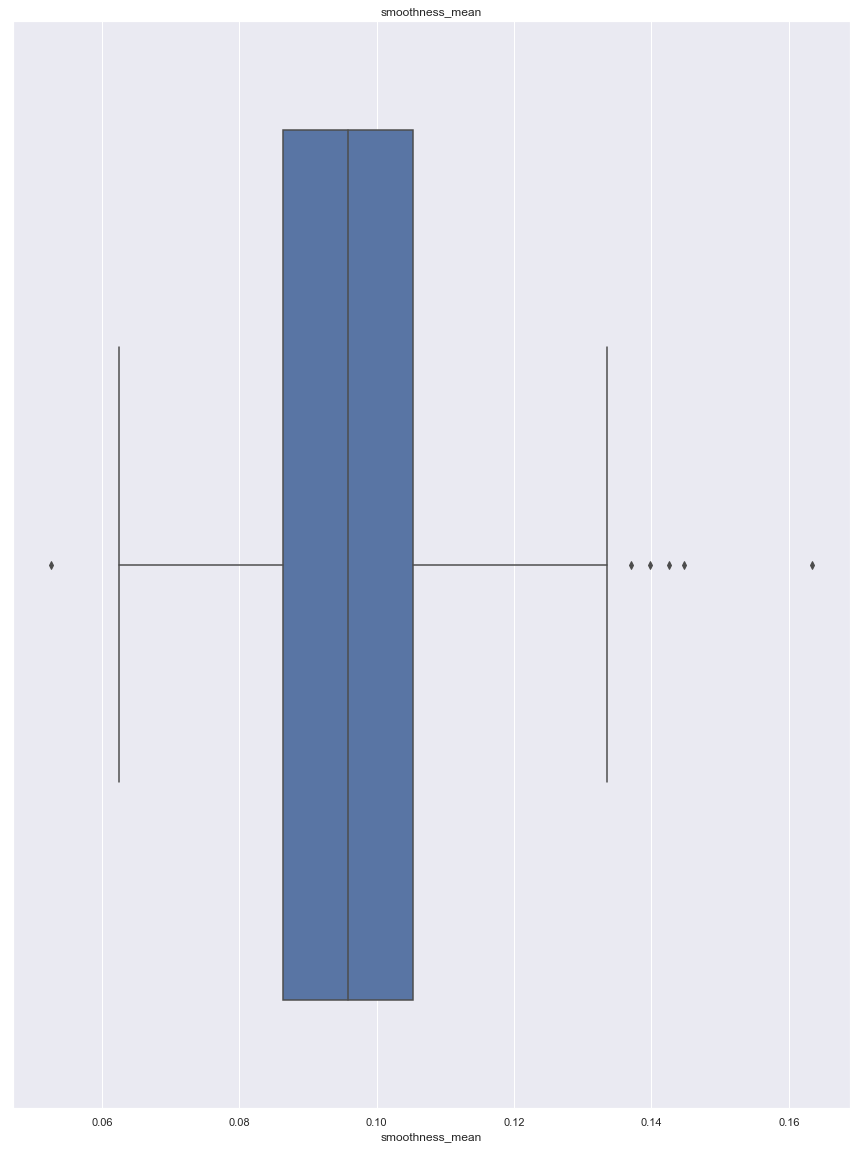

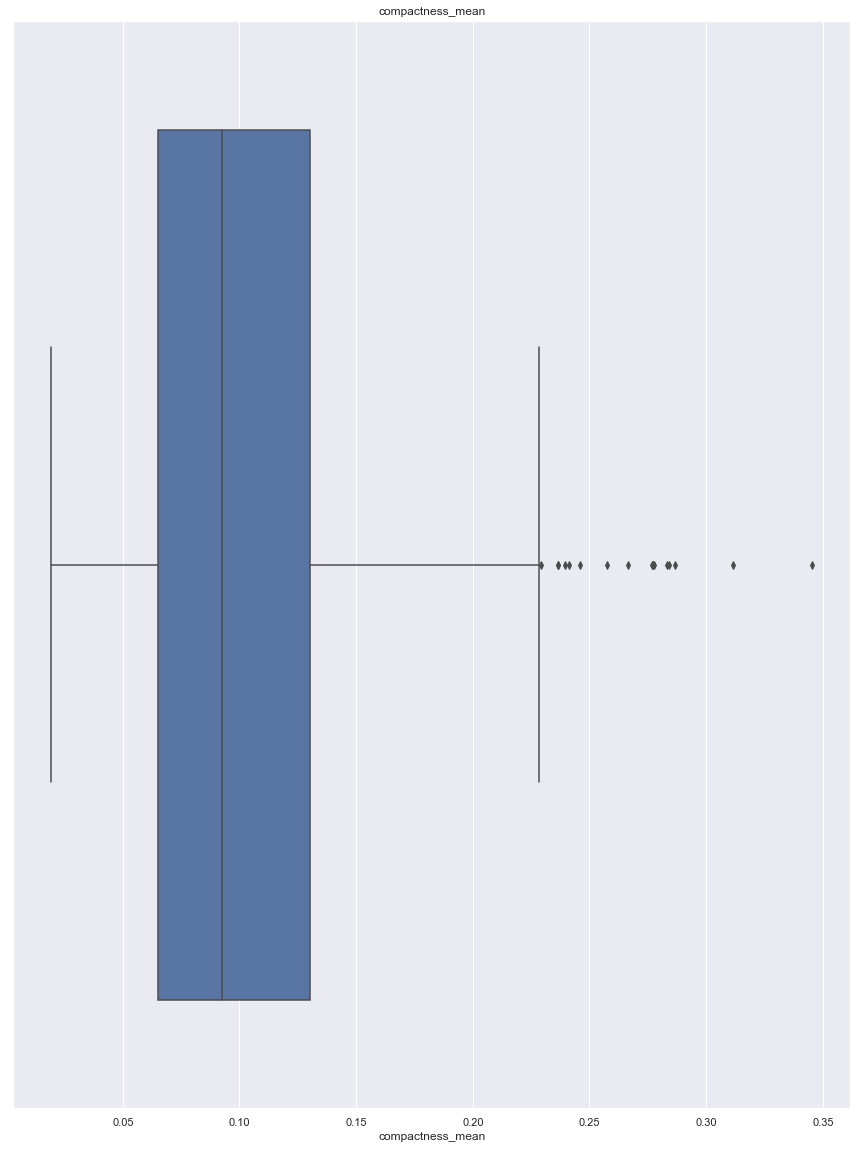

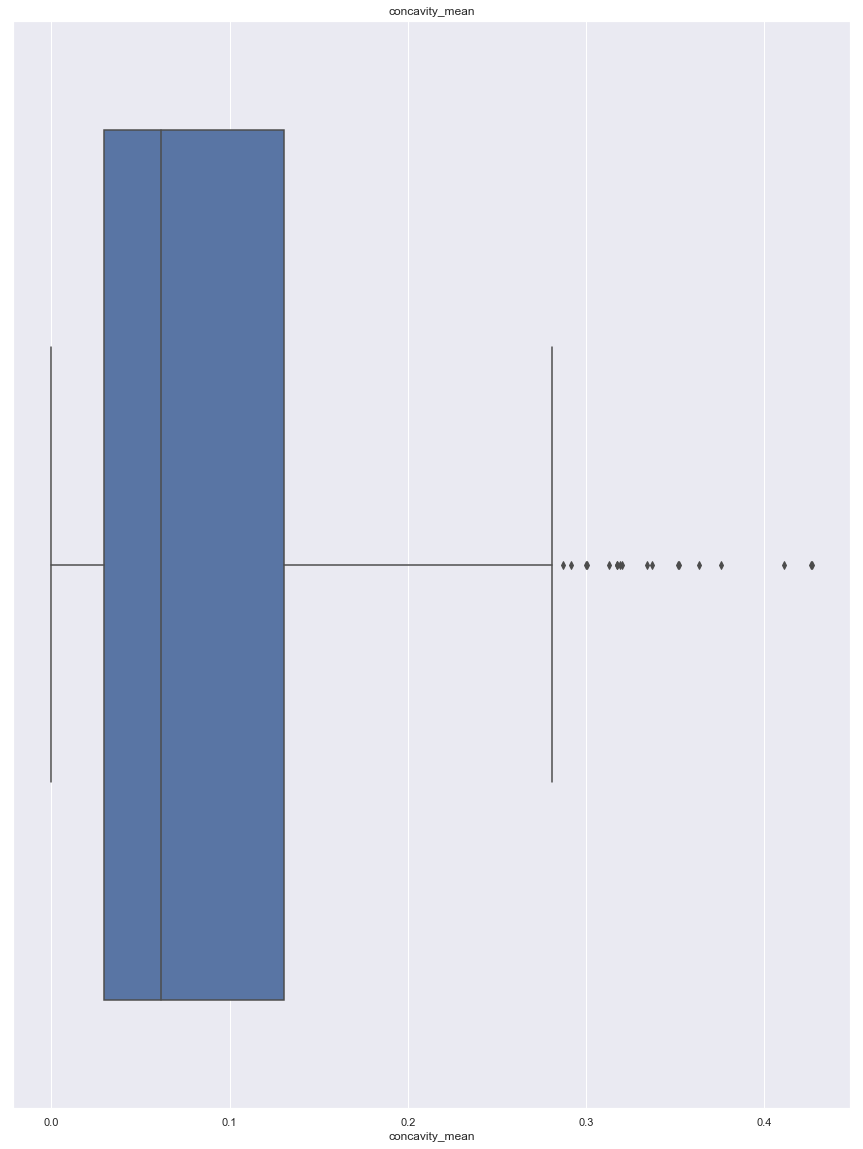

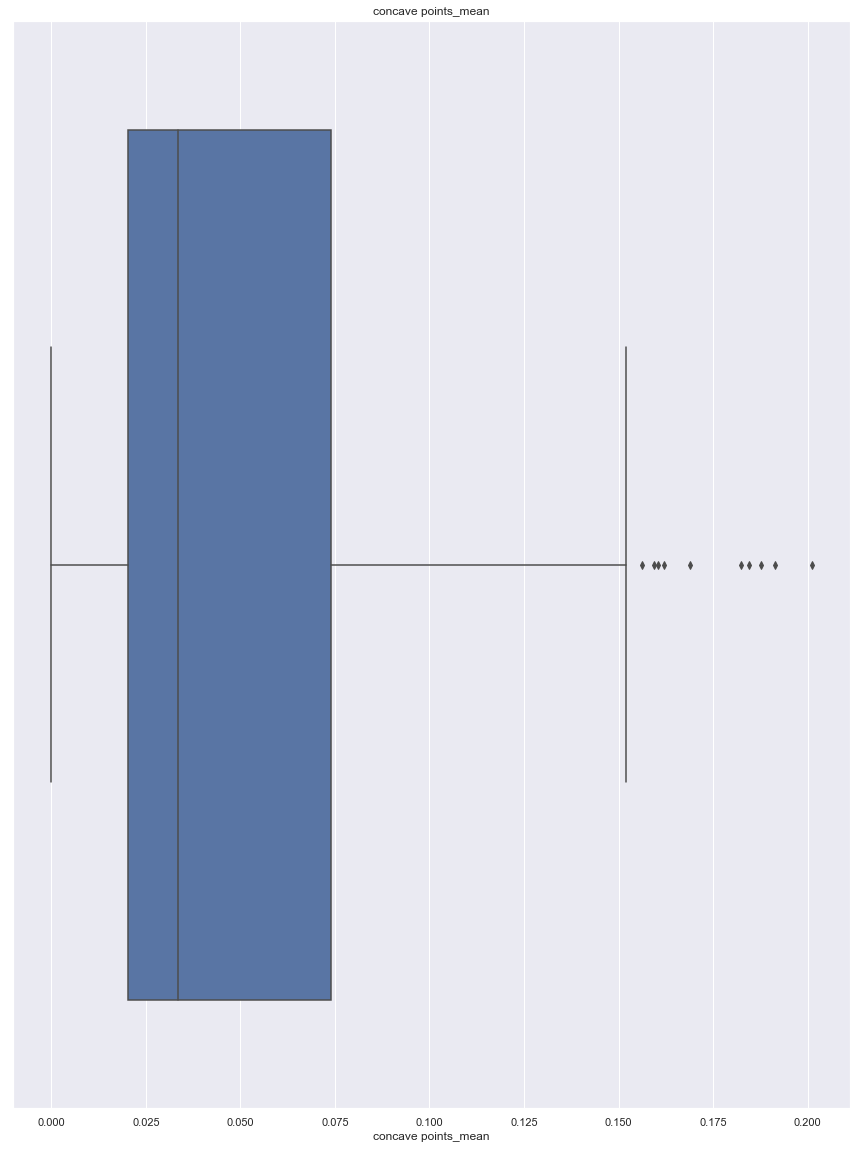

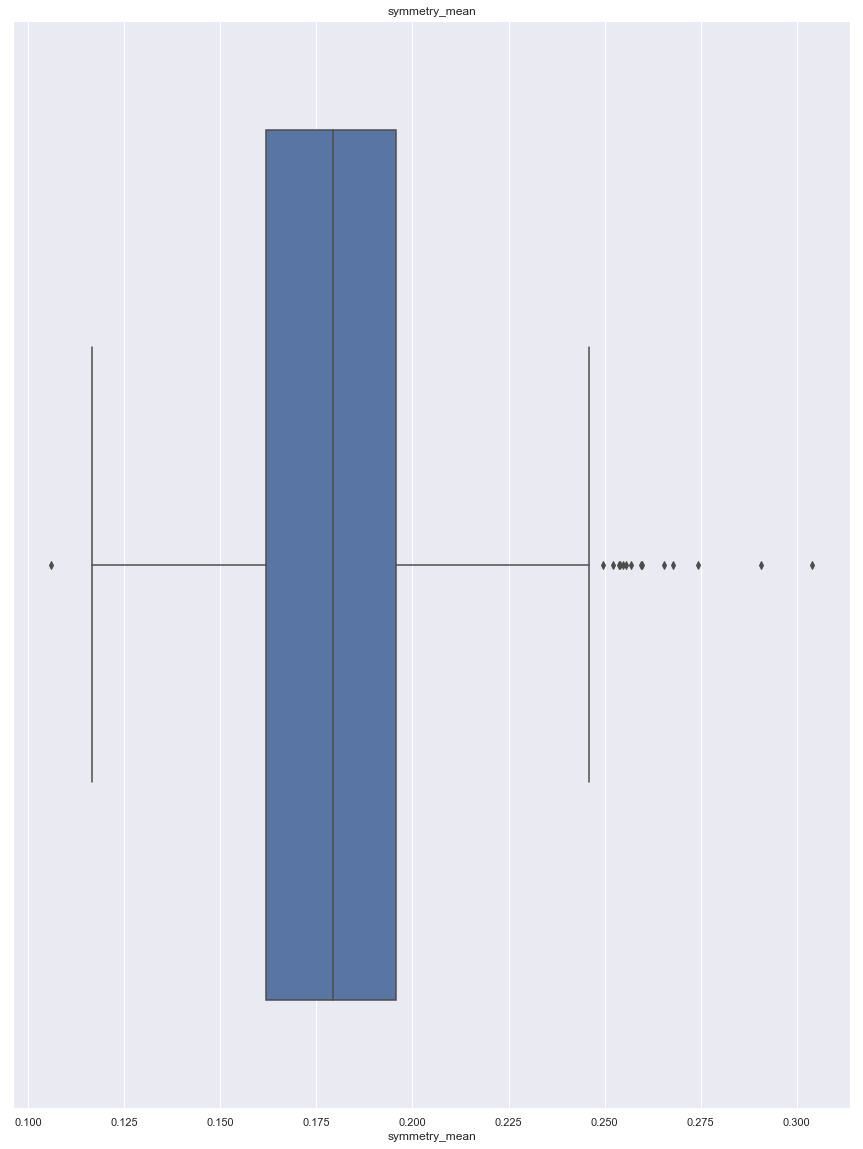

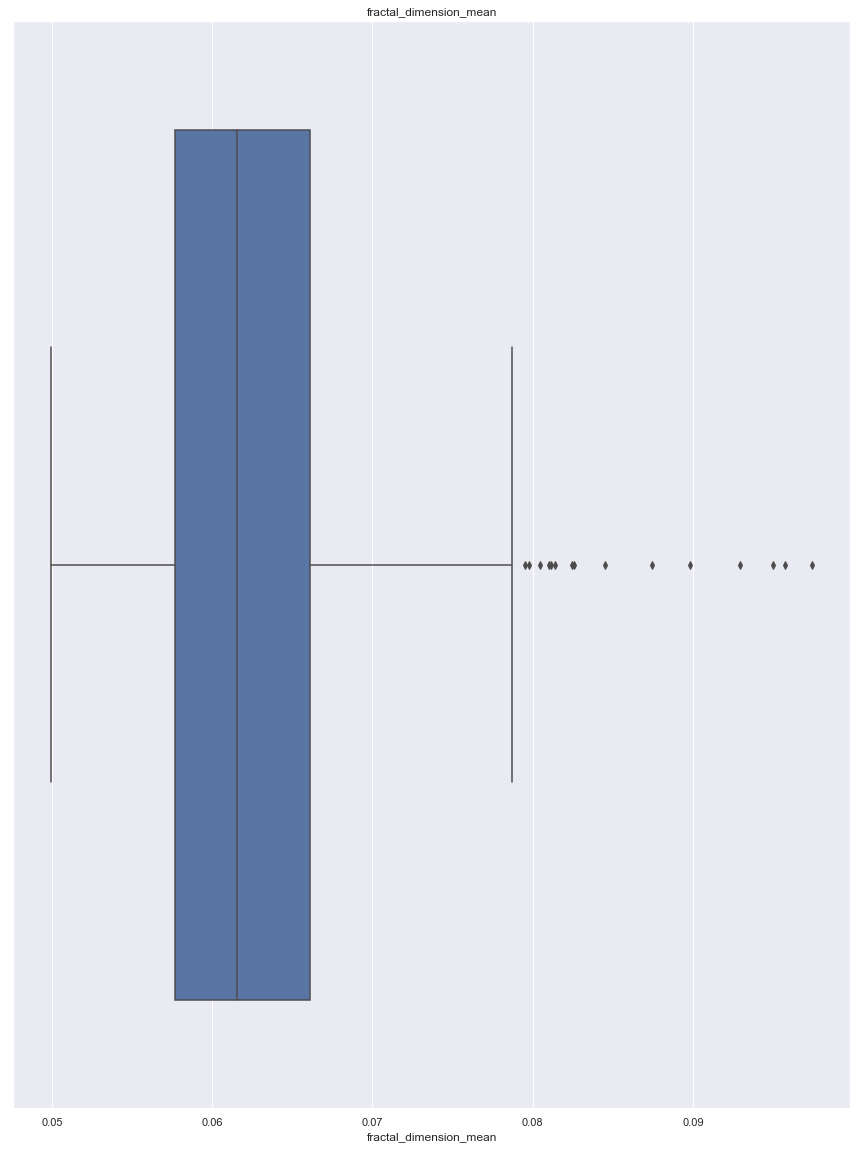

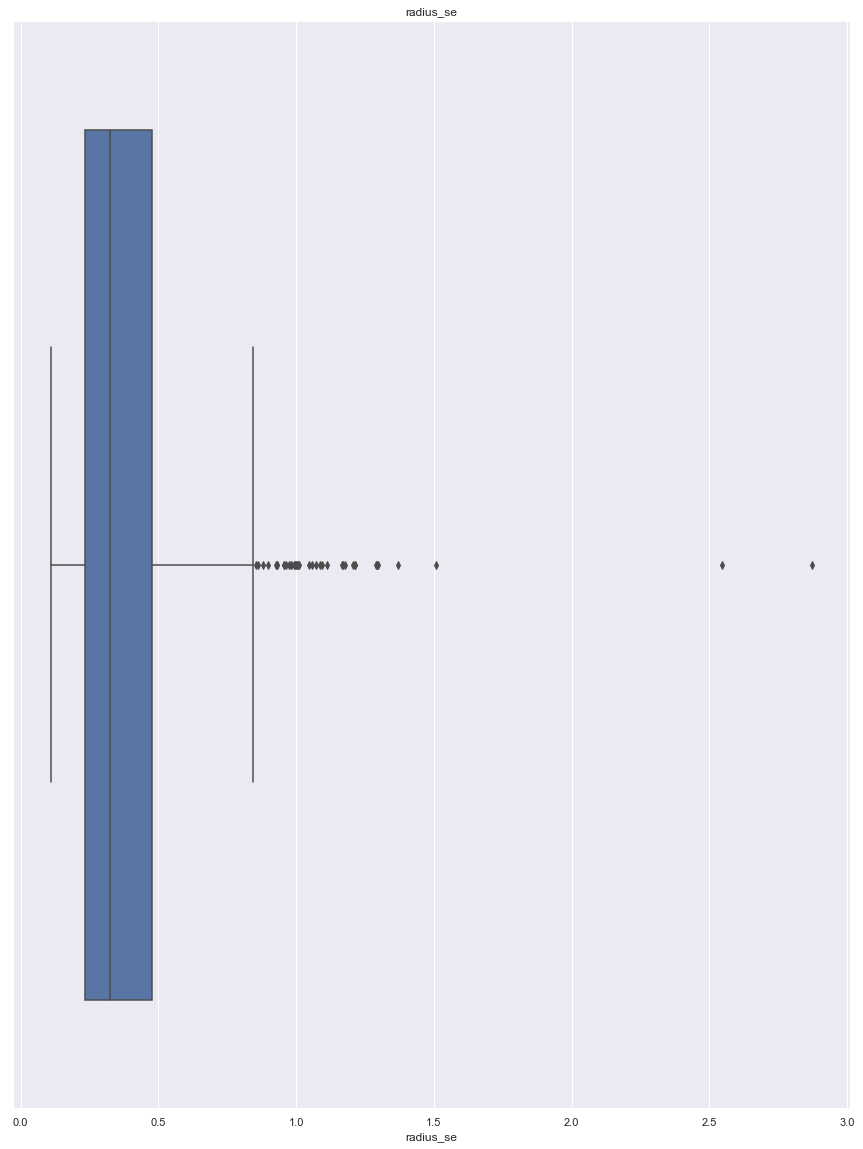

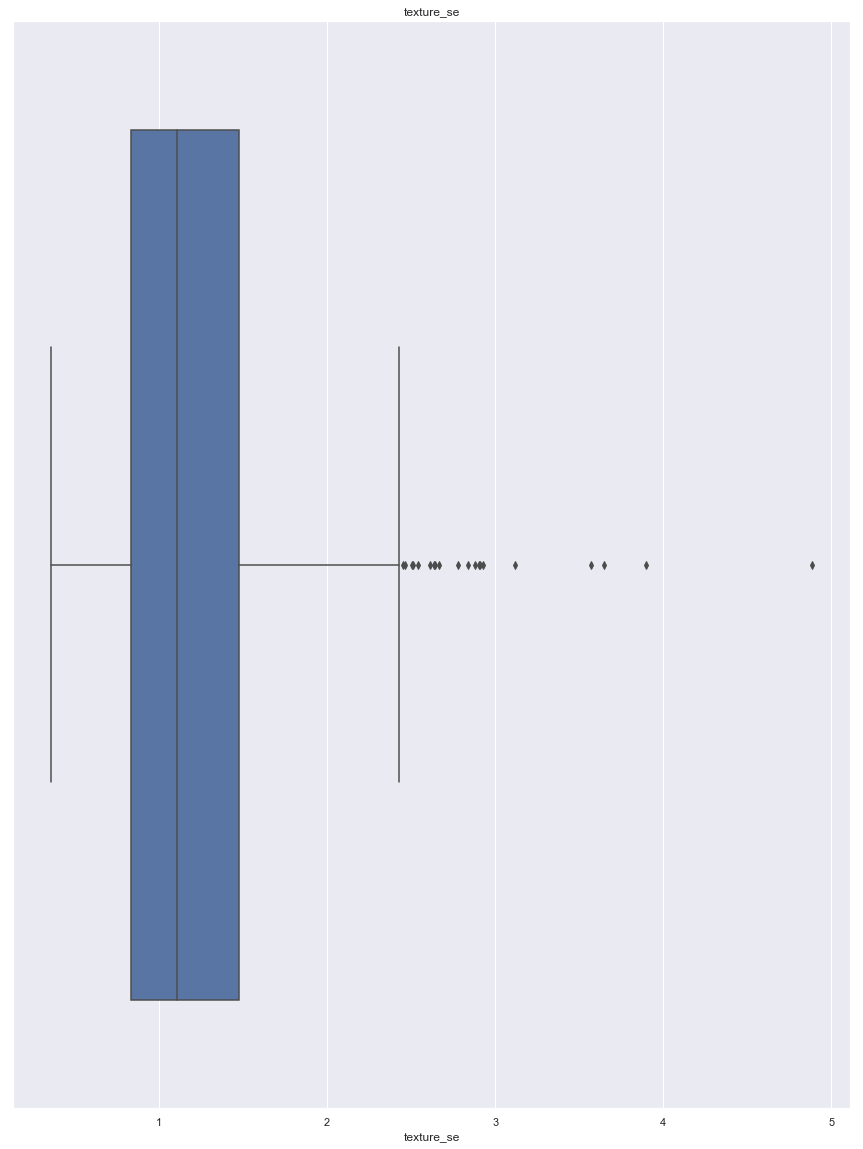

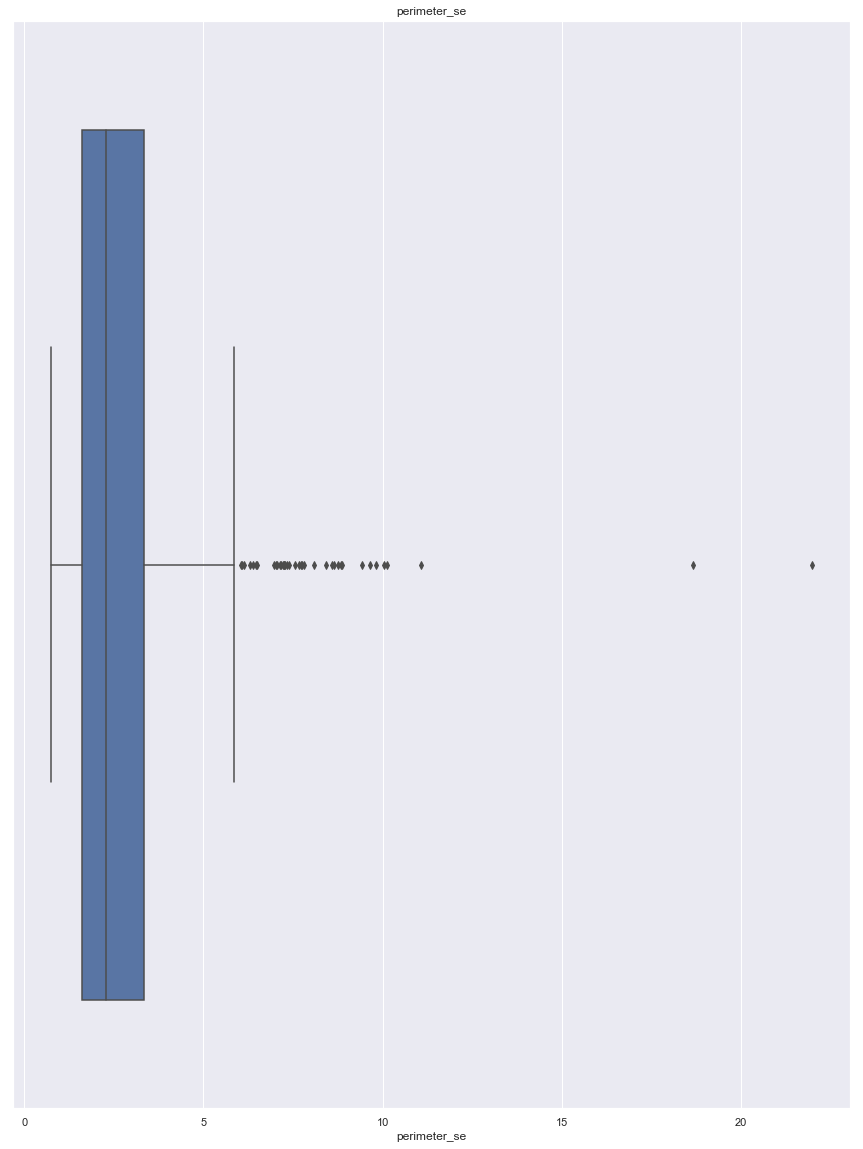

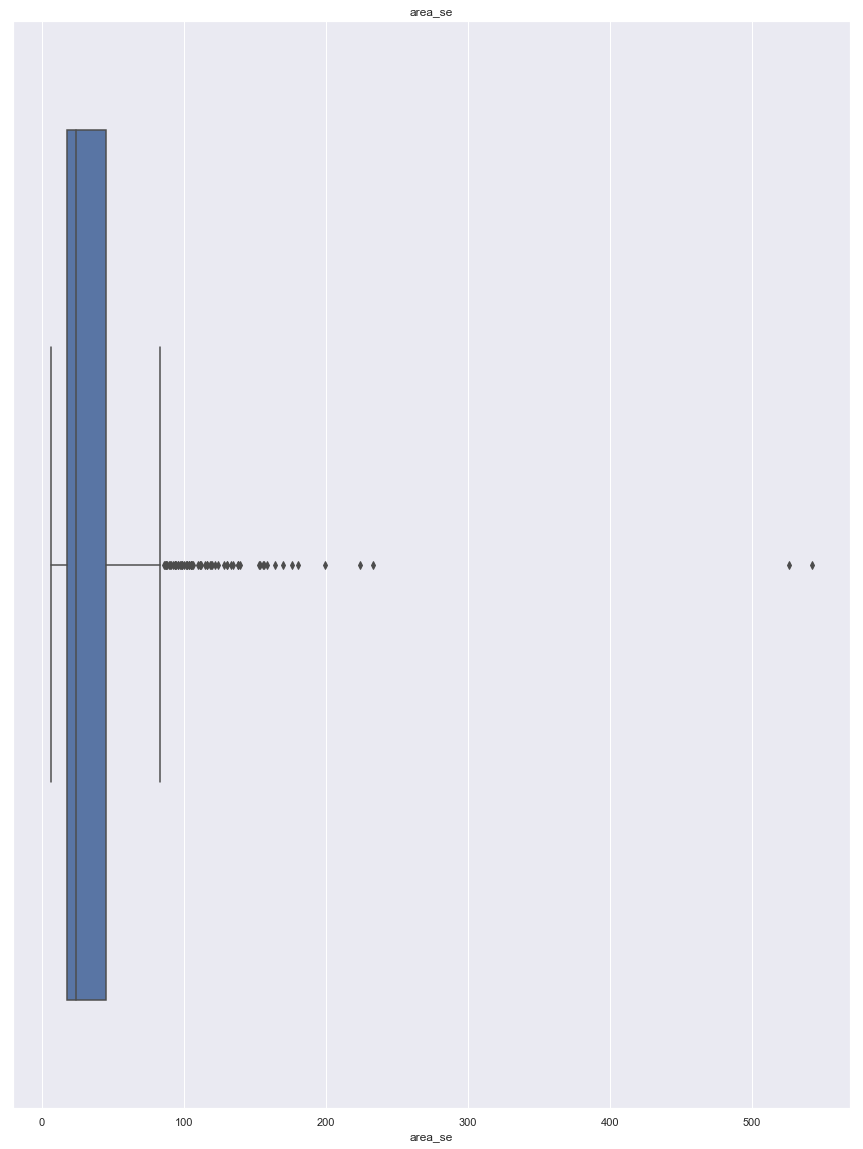

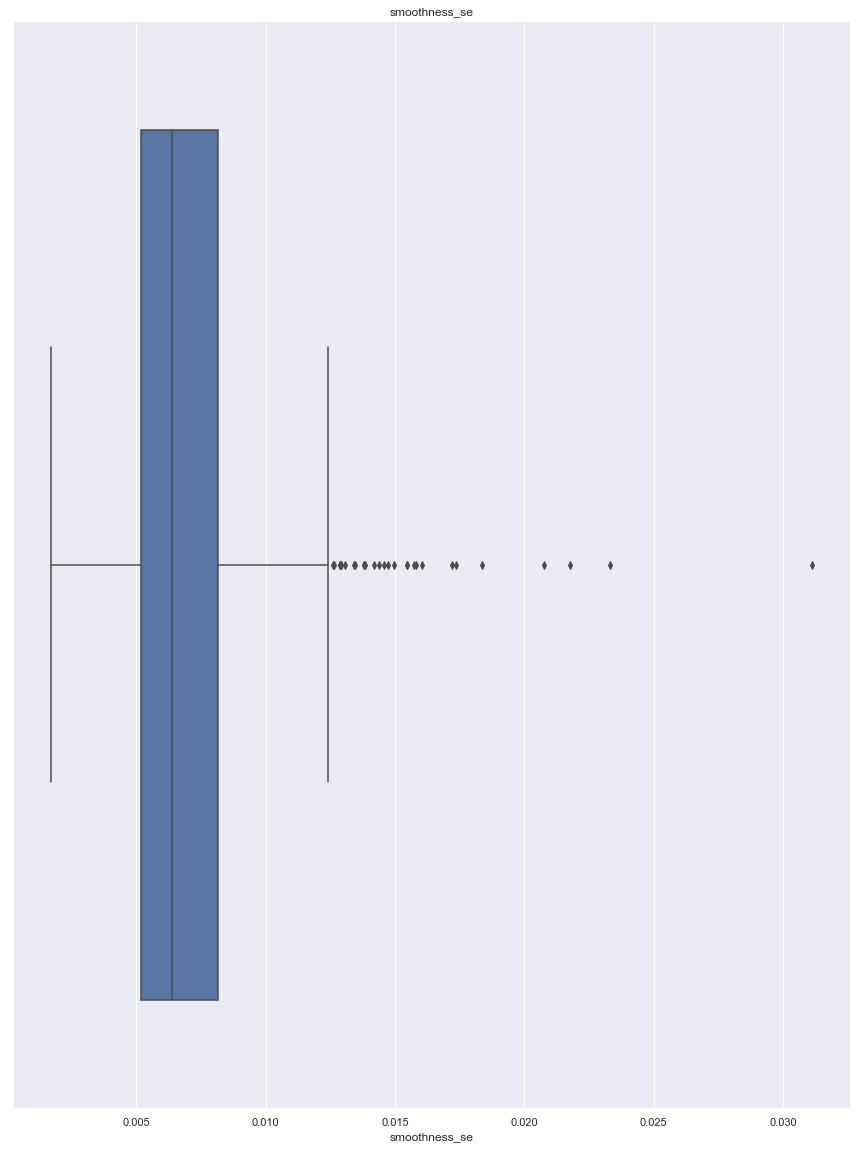

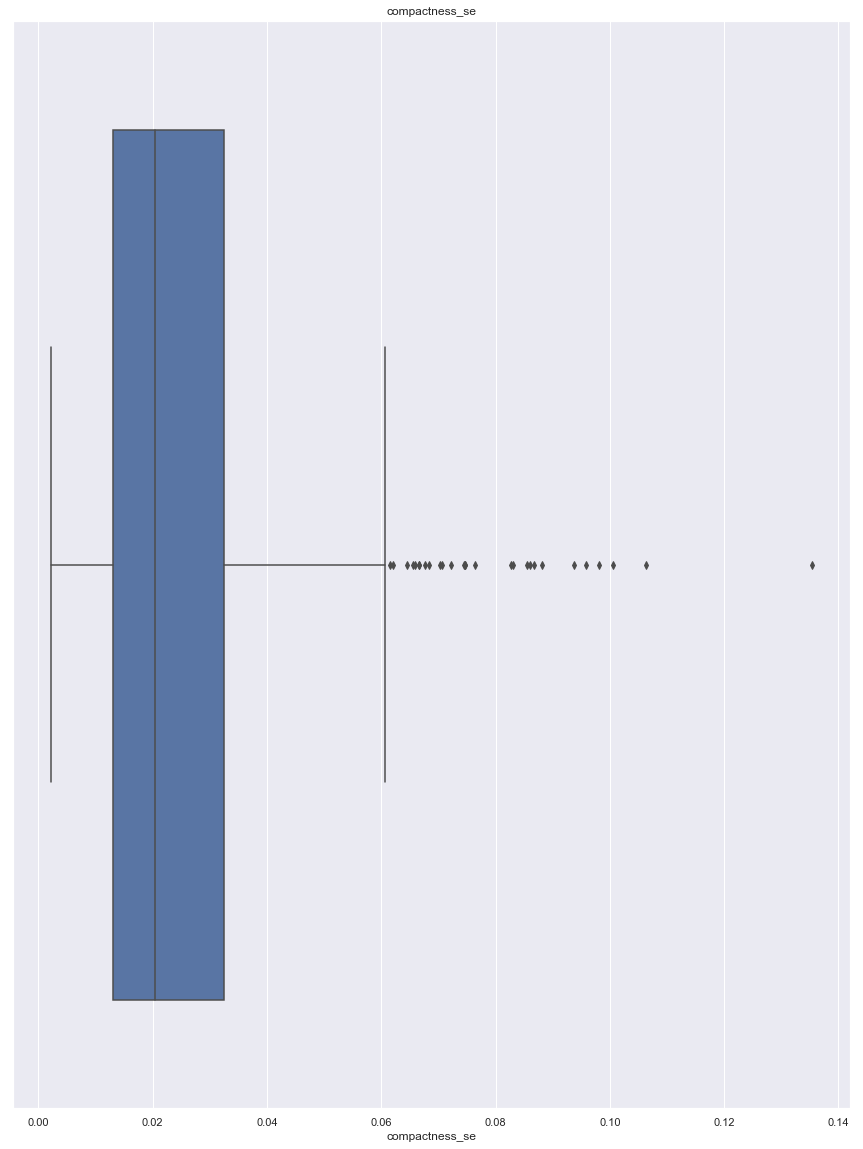

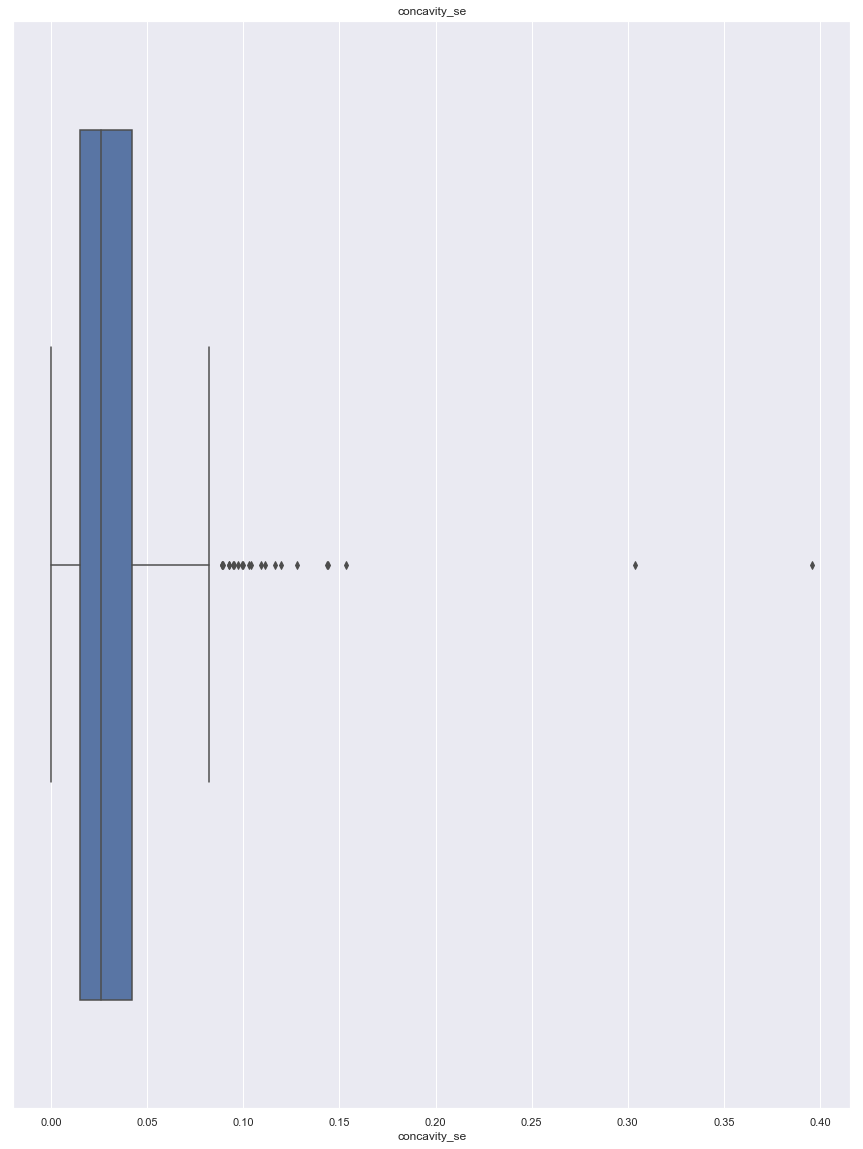

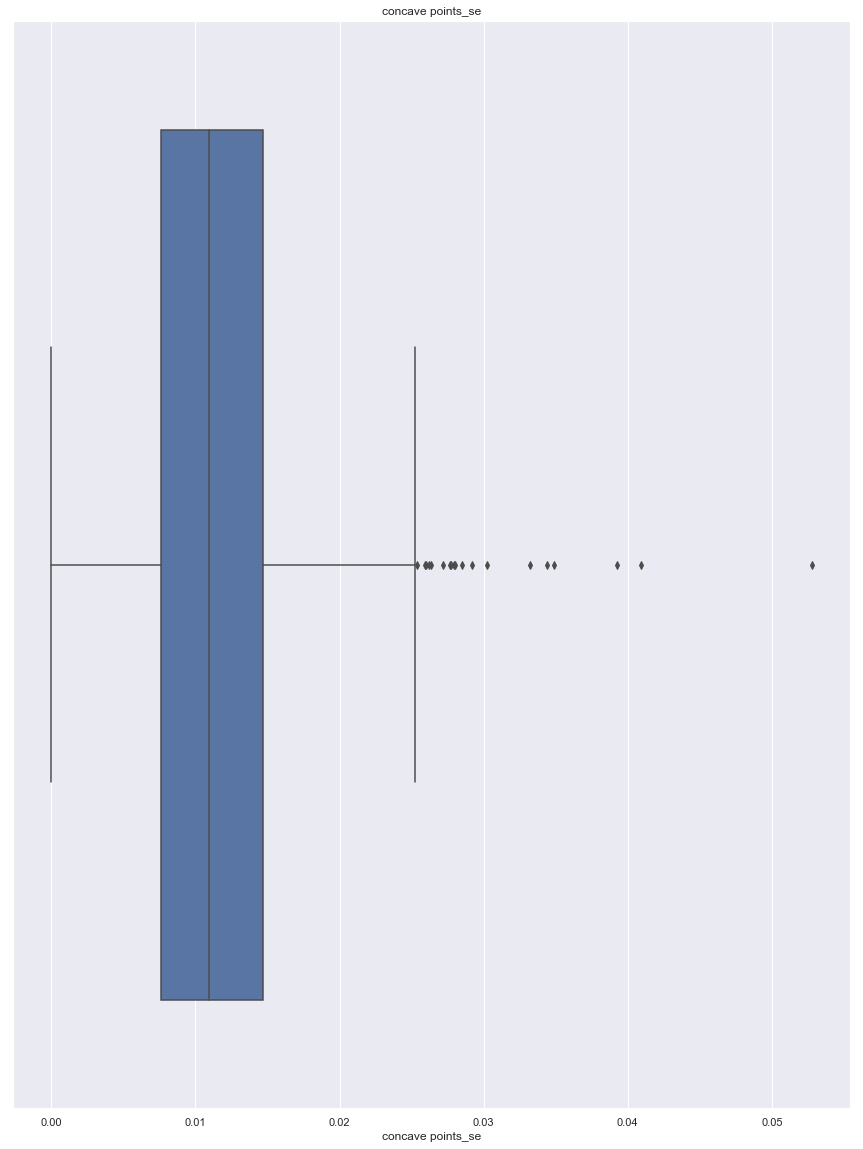

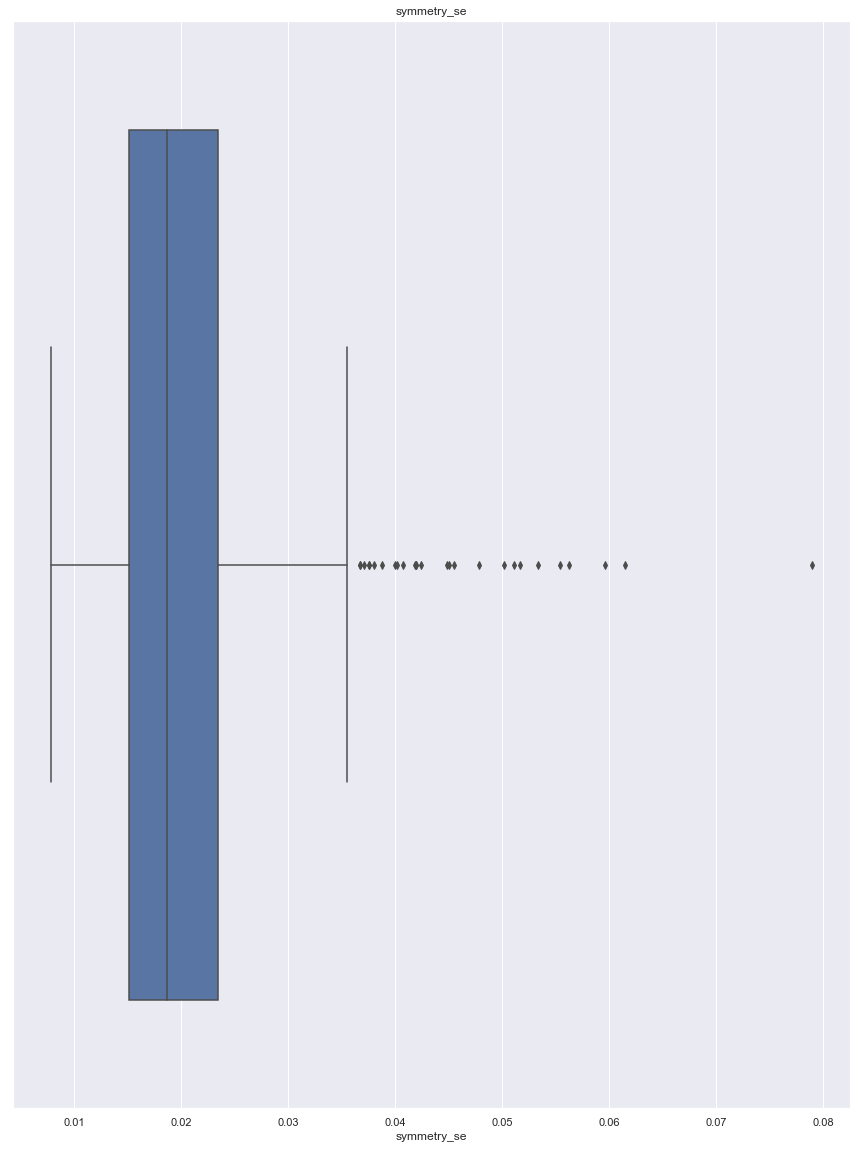

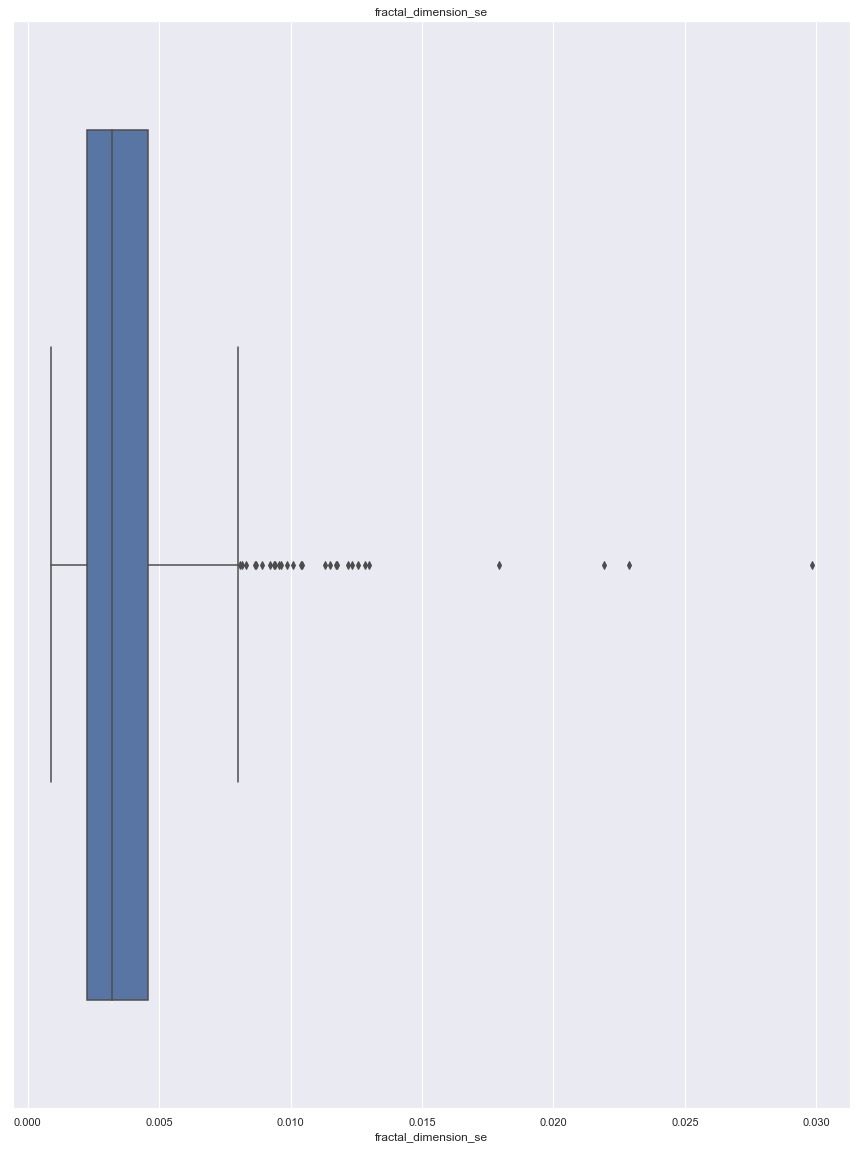

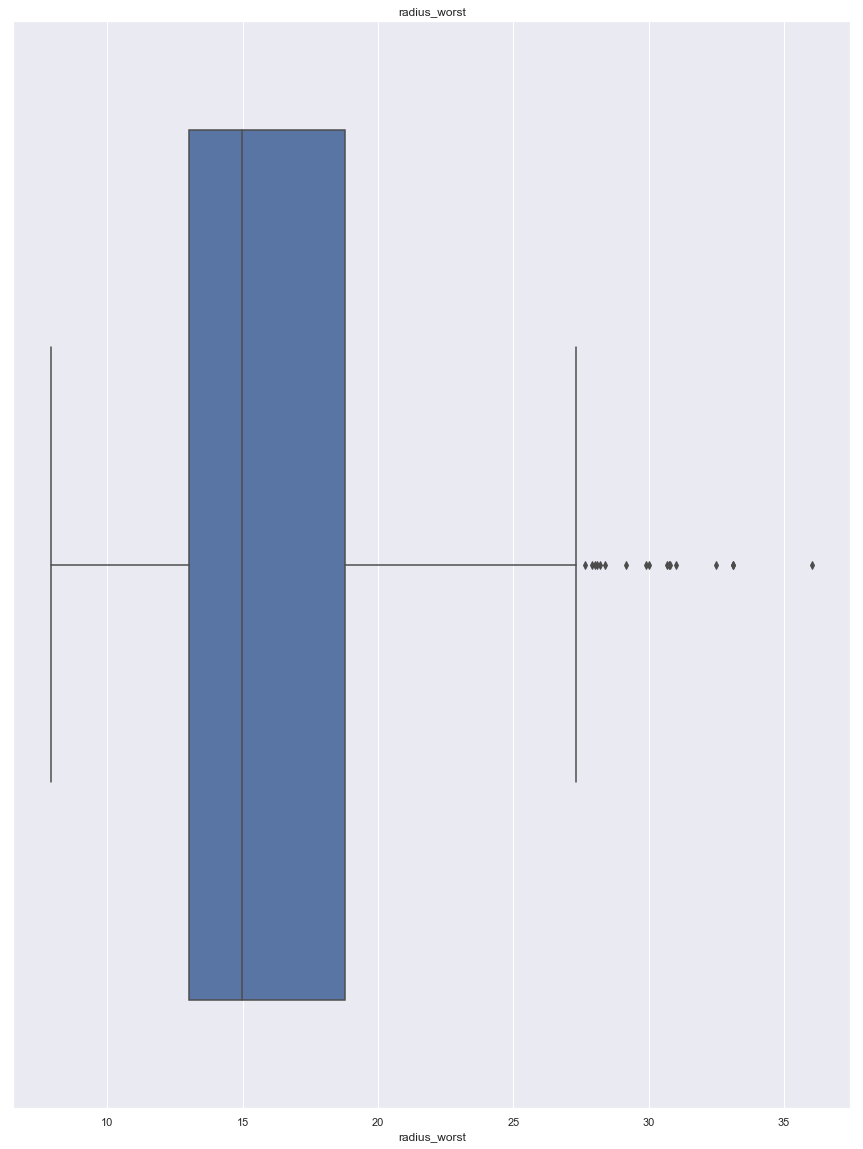

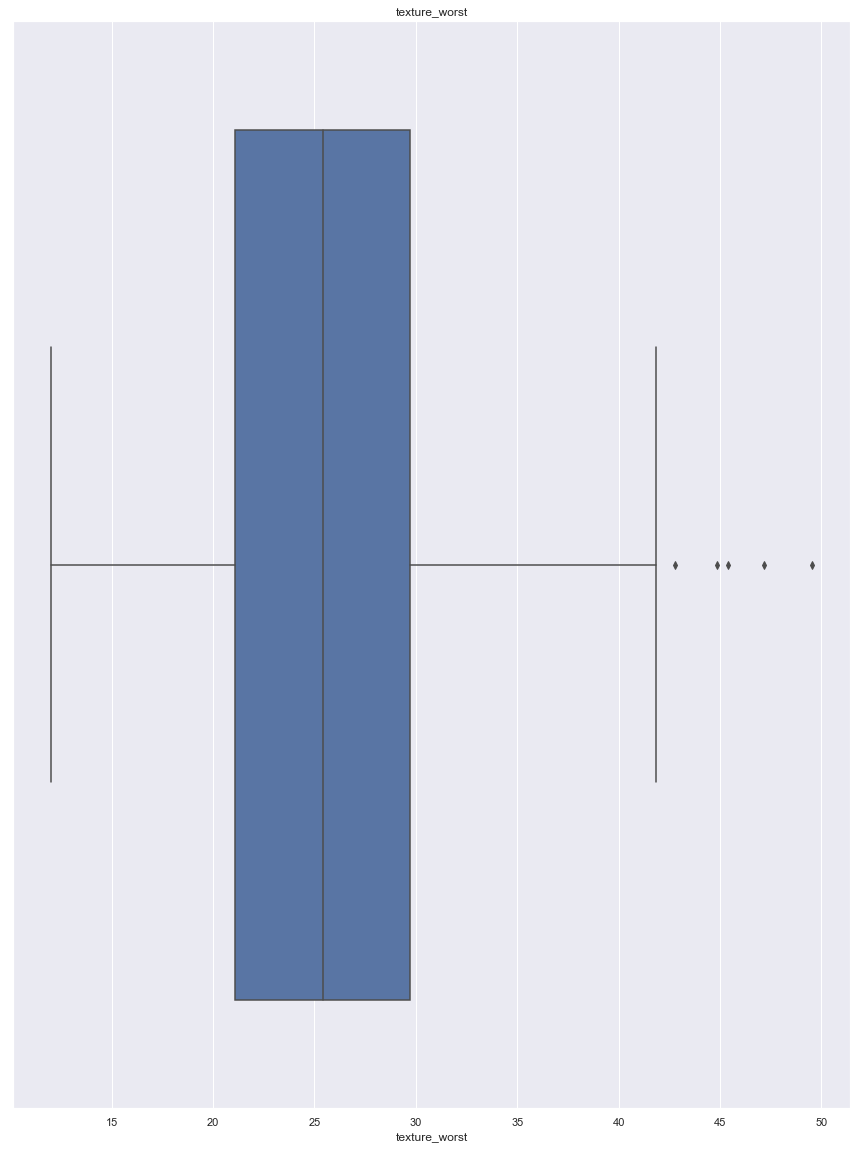

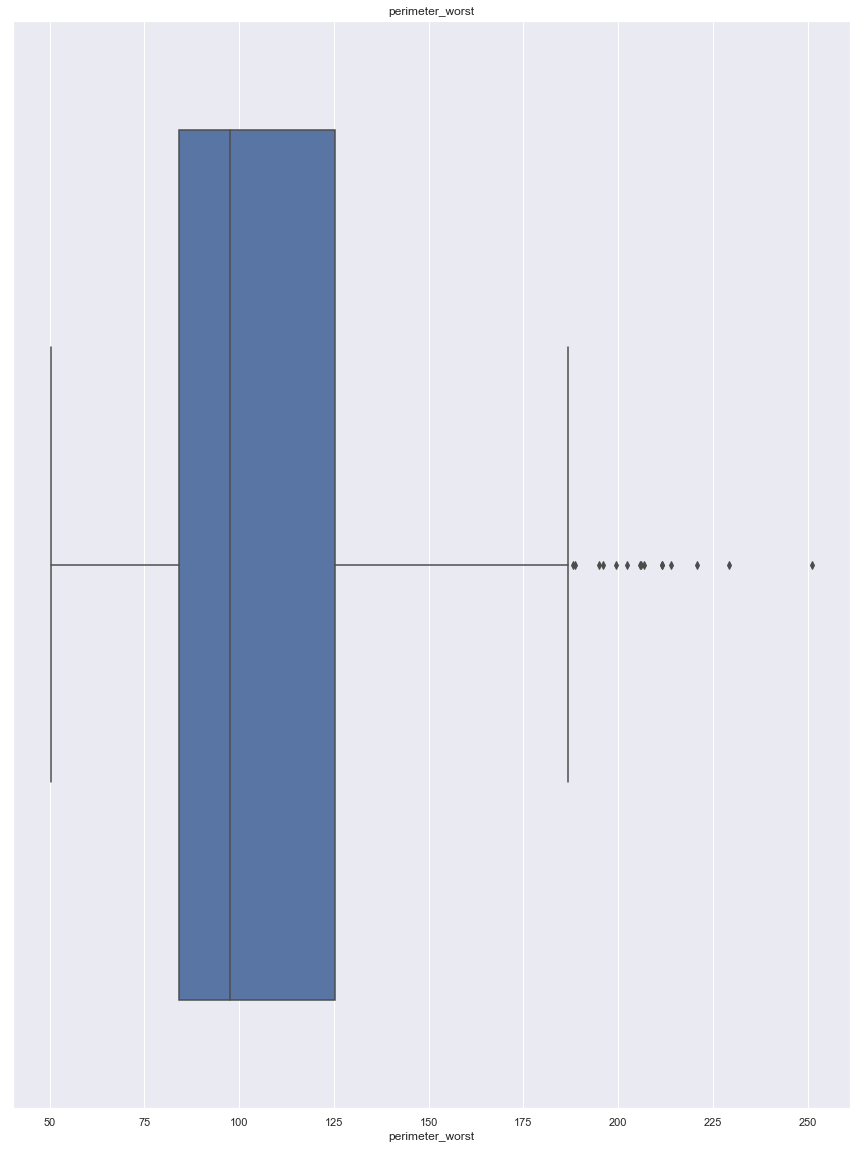

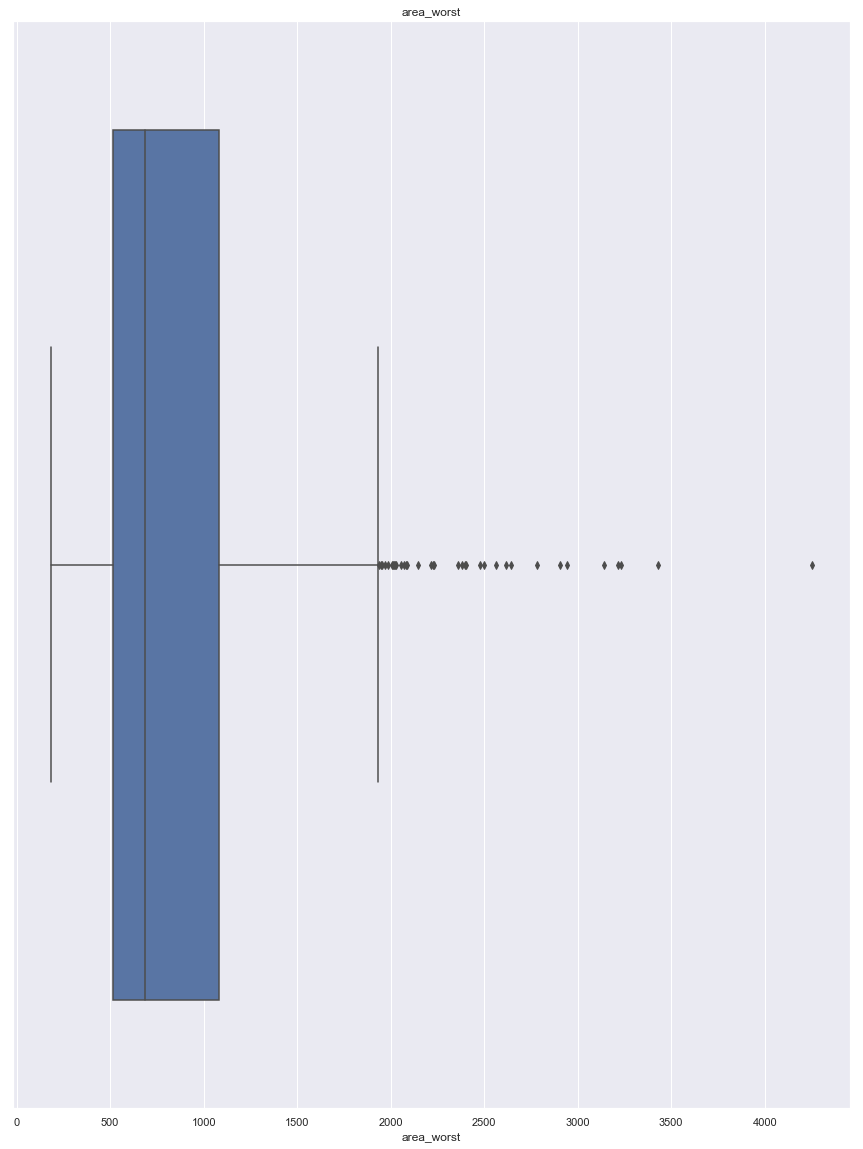

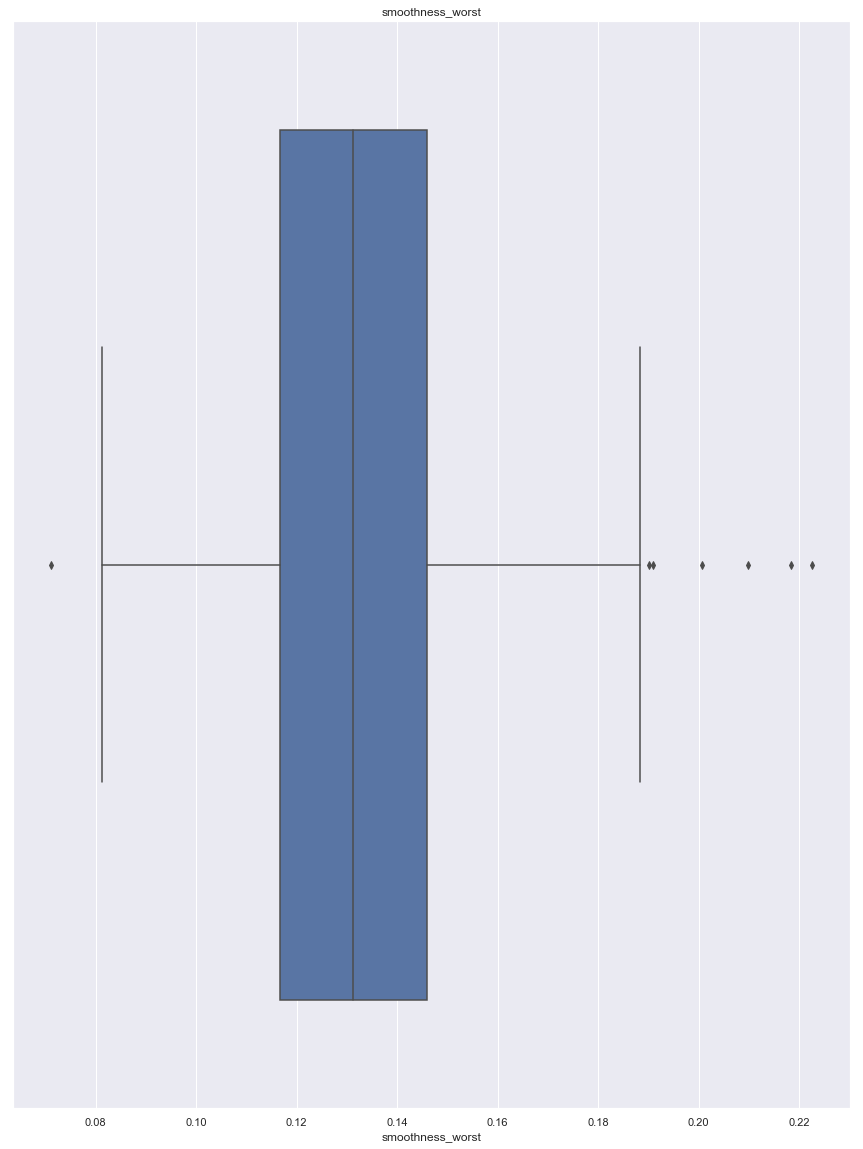

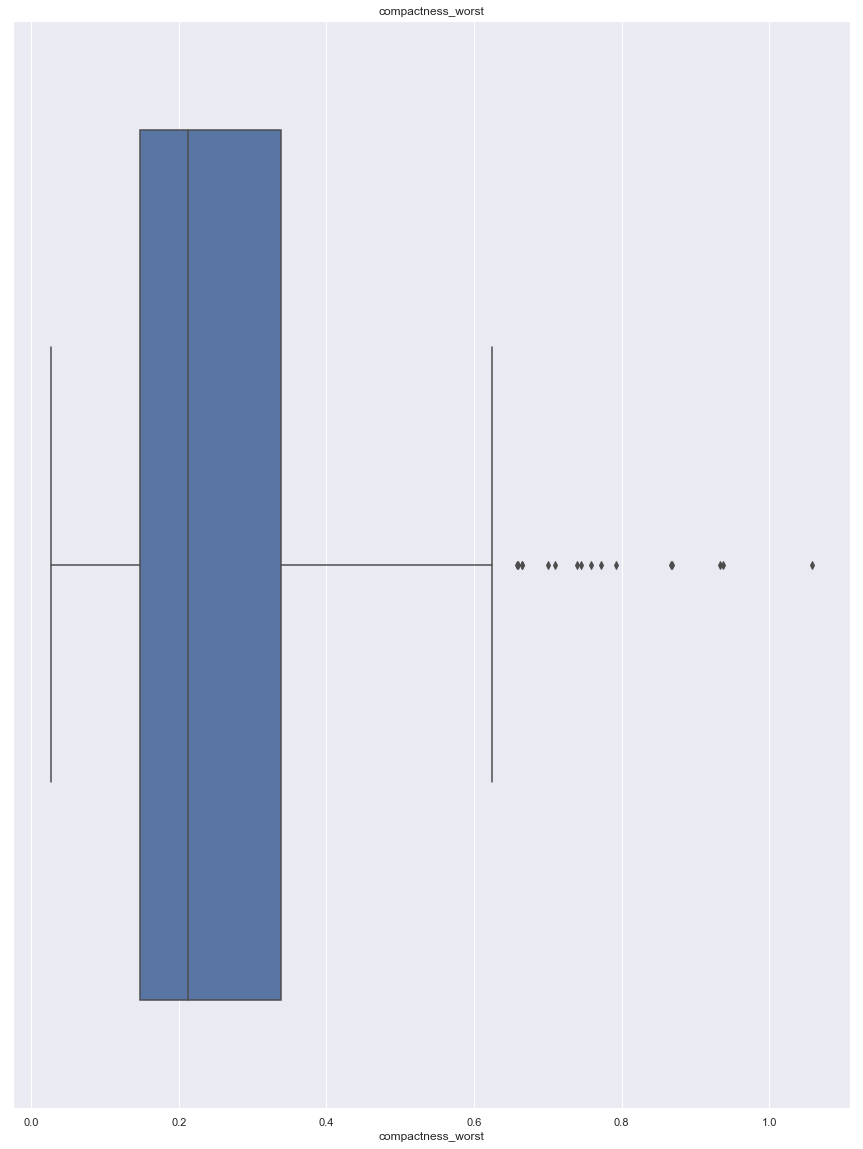

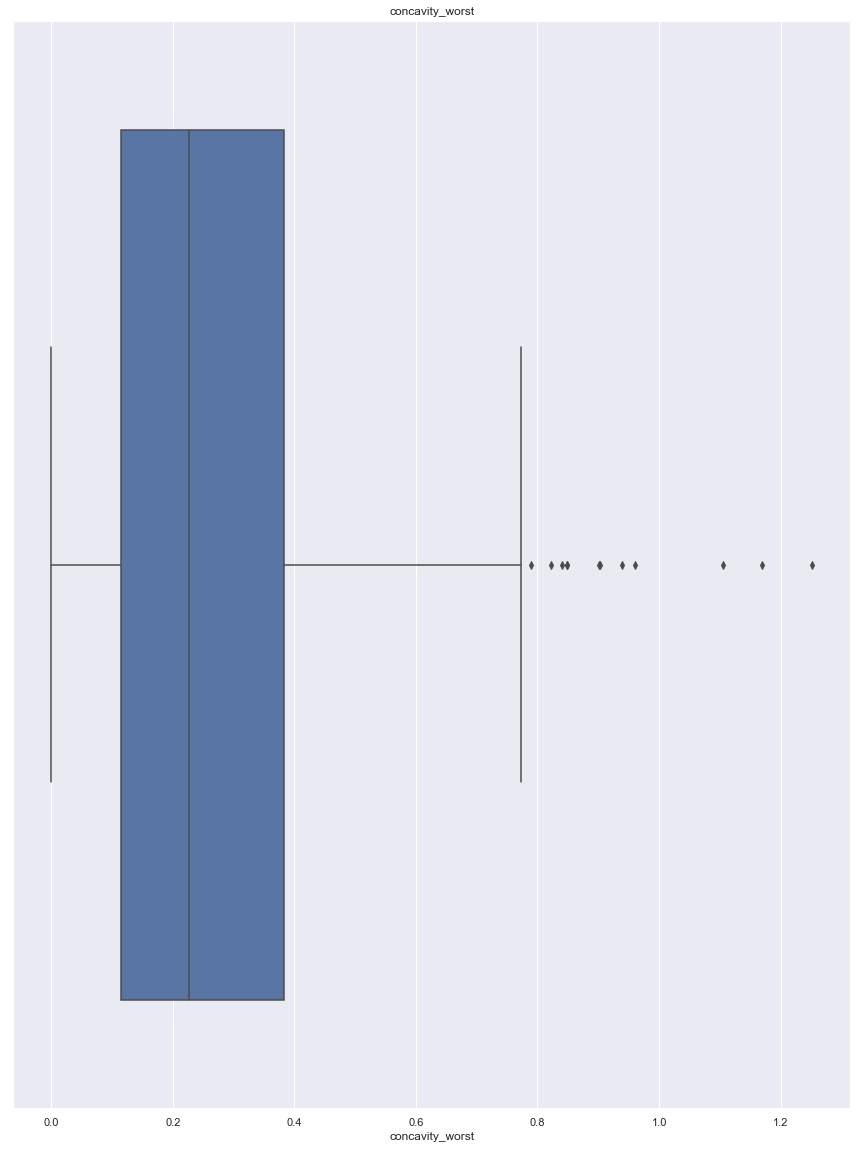

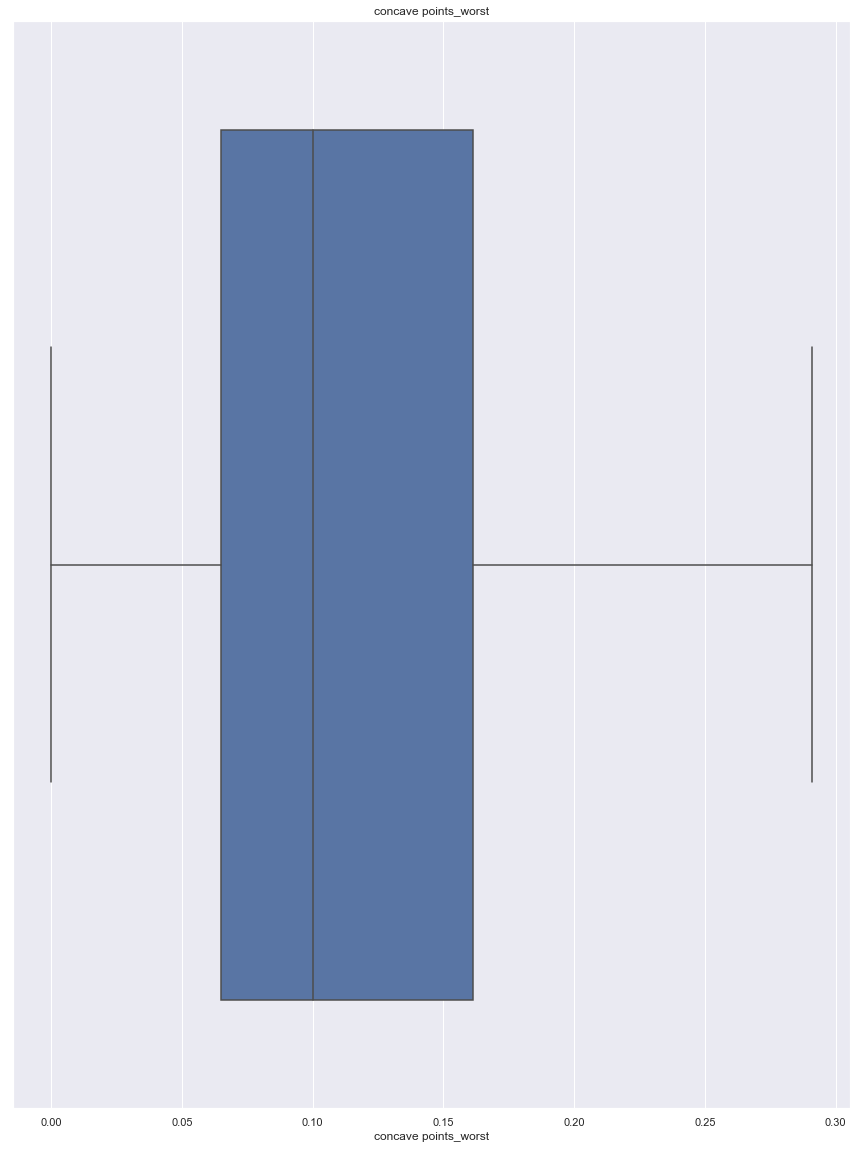

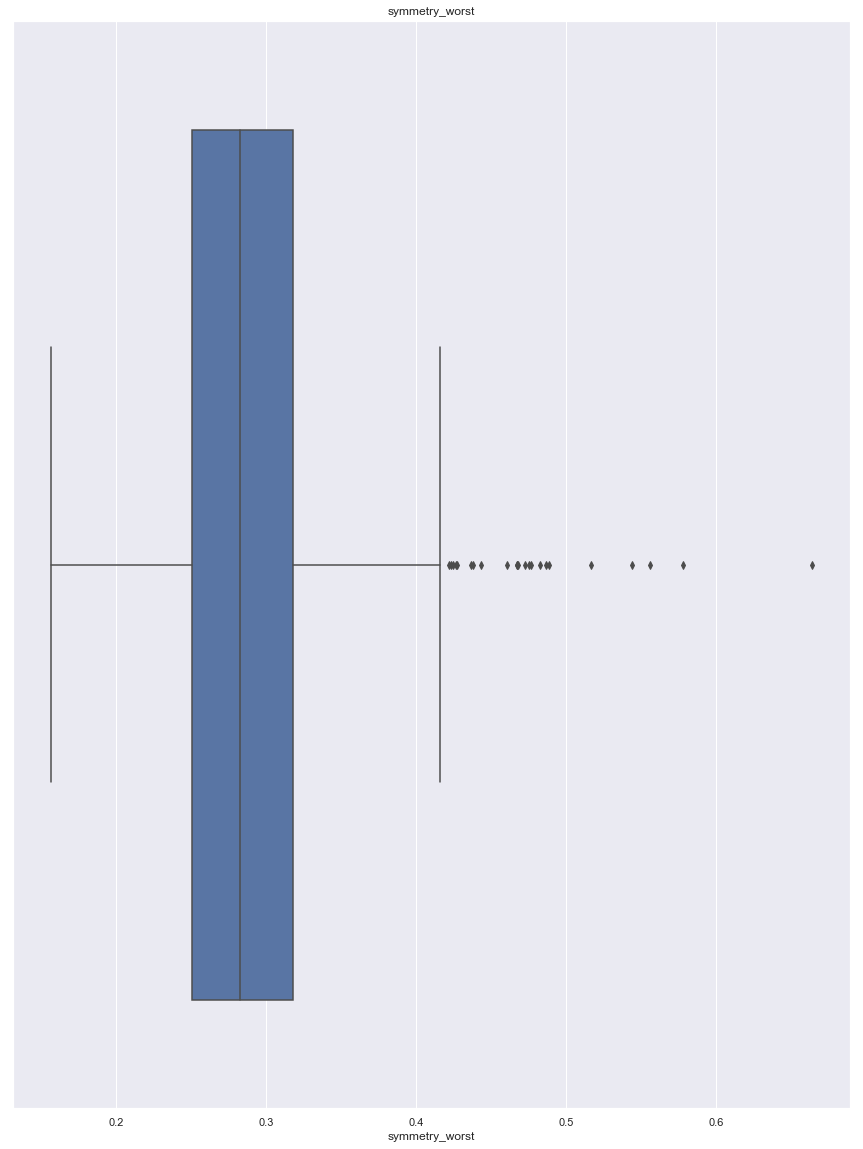

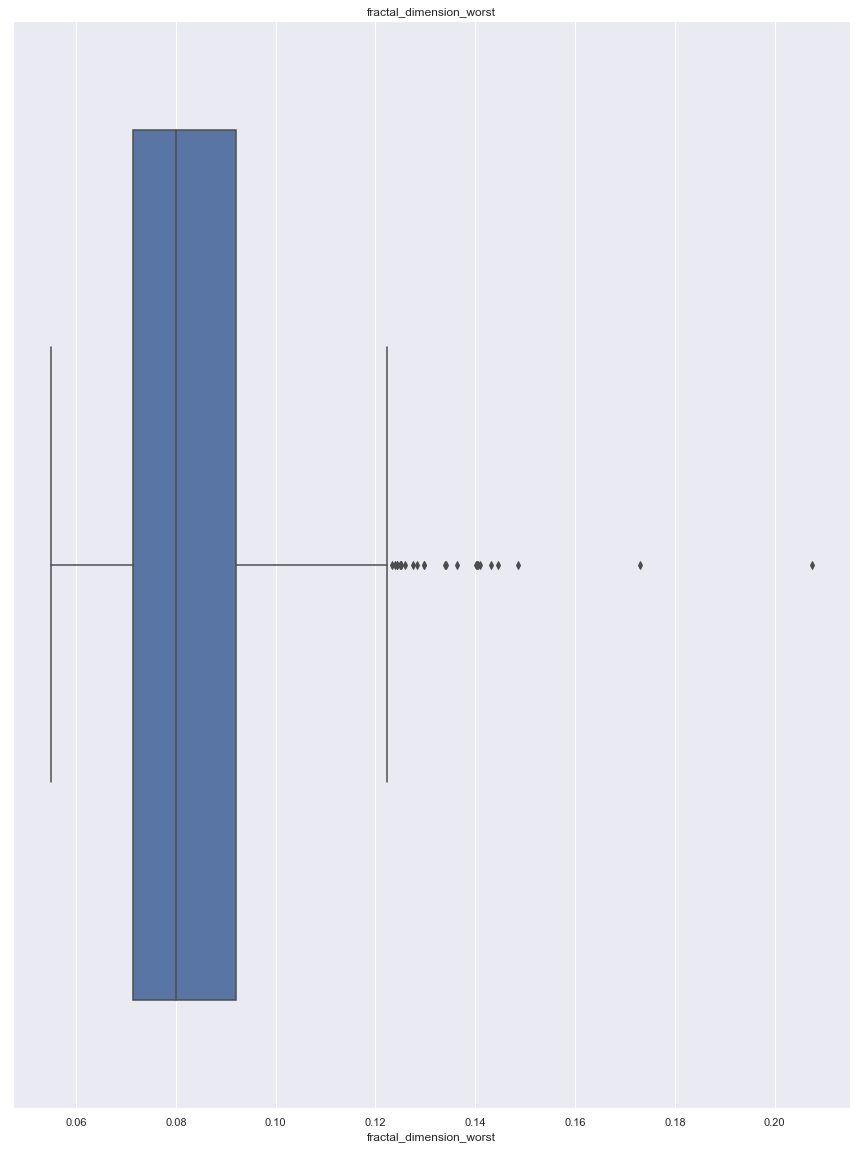

In [12]:
getBoxplots(breastData)

In [13]:
Q1=breastData.quantile(0.25)
Q3=breastData.quantile(0.75)
IQR = (Q3-Q1)
print(Q1)
print(Q3)
print(IQR)

id                         869218.000000
radius_mean                    11.700000
texture_mean                   16.170000
perimeter_mean                 75.170000
area_mean                     420.300000
smoothness_mean                 0.086370
compactness_mean                0.064920
concavity_mean                  0.029560
concave points_mean             0.020310
symmetry_mean                   0.161900
fractal_dimension_mean          0.057700
radius_se                       0.232400
texture_se                      0.833900
perimeter_se                    1.606000
area_se                        17.850000
smoothness_se                   0.005169
compactness_se                  0.013080
concavity_se                    0.015090
concave points_se               0.007638
symmetry_se                     0.015160
fractal_dimension_se            0.002248
radius_worst                   13.010000
texture_worst                  21.080000
perimeter_worst                84.110000
area_worst      

#### 4. EDA


In [14]:
df=breastData.copy()

In [15]:
## Define the bar plot function | Start
def plotbar(col,title,lx,ly):
    plt.figure(figsize=(20,10))
    sns.set_context('talk')
    ax = (col).plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel(ly, fontsize=16)
    ax.set_xlabel(lx, fontsize=16)
    plt.title(title)
    x_offset = -0.10
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:+.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.show()
## Define the bar plot function | End

In [16]:
## Function to do binning of continuos variables | Start
def binnumeric(col,df):
    newCol = col+'_bin'
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print(Q1,Q3)
    df[newCol] = df[col].apply(lambda x: dobinning(x,Q1,Q3))
    df=df.drop(col,axis=1)
def dobinning(x,Q1,Q3):
    if(x<Q1*1.5):
        return 'low'
    elif(x>Q3*1.5):
        return 'high'
    else:
        return 'normal'

    
def binnumeric1(col):
    newCol = col+'_bin'
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print(Q1,Q3)
## Function to do binning of continuos variables | End

In [17]:
for col in df.columns:
    if(col!='id' and col!='diagnosis' and col!='radius_mean'):
        #print(col,df)
        binnumeric(col,df)

16.17 21.8
75.17 104.1
420.3 782.7
0.08637 0.1053
0.06492 0.1304
0.029560000000000003 0.1307
0.020309999999999998 0.07400000000000001
0.1619 0.1957
0.0577 0.06612
0.2324 0.4789
0.8339 1.474
1.6059999999999999 3.3569999999999998
17.85 45.19
0.005169 0.008145999999999999
0.013080000000000001 0.03245
0.015090000000000001 0.04205
0.007638 0.014709999999999999
0.01516 0.02348
0.002248 0.0045579999999999996
13.01 18.79
21.08 29.72
84.11 125.4
515.3 1084.0
0.1166 0.146
0.1472 0.3391
0.1145 0.3829
0.06493 0.1614
0.2504 0.3179
0.07146 0.09208


In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst_bin,texture_worst_bin,perimeter_worst_bin,area_worst_bin,smoothness_worst_bin,compactness_worst_bin,concavity_worst_bin,concave points_worst_bin,symmetry_worst_bin,fractal_dimension_worst_bin
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,normal,low,normal,high,low,high,high,high,normal,normal
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,normal,low,normal,high,low,low,normal,normal,low,low
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,normal,low,normal,high,low,normal,normal,high,low,low
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,low,low,low,low,normal,high,high,high,high,high
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,normal,low,normal,normal,low,low,normal,normal,low,low


In [19]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'texture_mean_bin',
       'perimeter_mean_bin', 'area_mean_bin', 'smoothness_mean_bin',
       'compactness_mean_bin', 'concavity_mean_bin', 'concave points_mean_bin',
       'symmetry_mean_bin', 'fractal_dimension_mean_bin', 'radius_se_bin',
       'texture_se_bin', 'perimeter_se_bin', 'area_se_bin',
       'smoothness_se_bin', 'compactness_se_bin', 'concavity_se_bin',

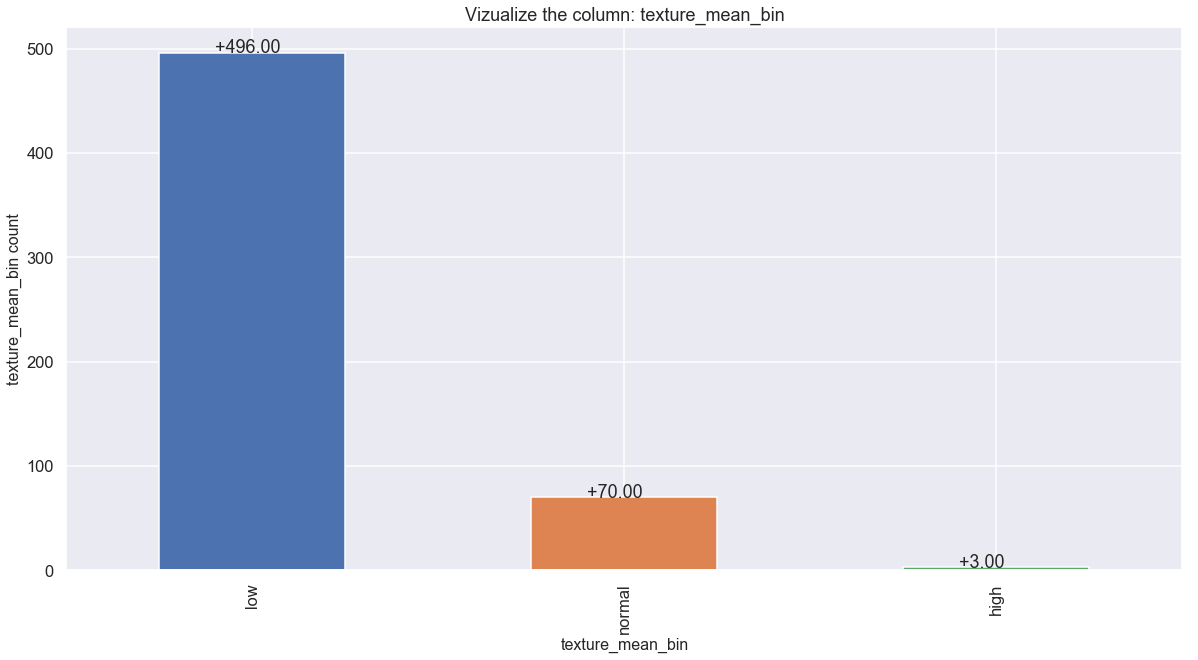

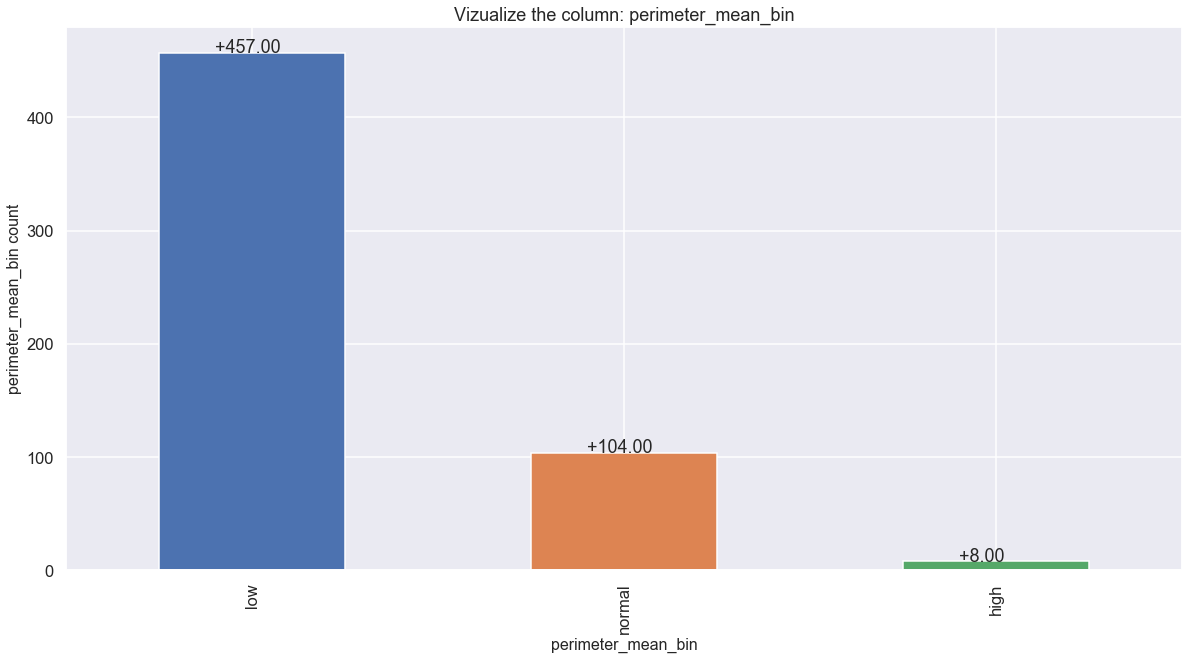

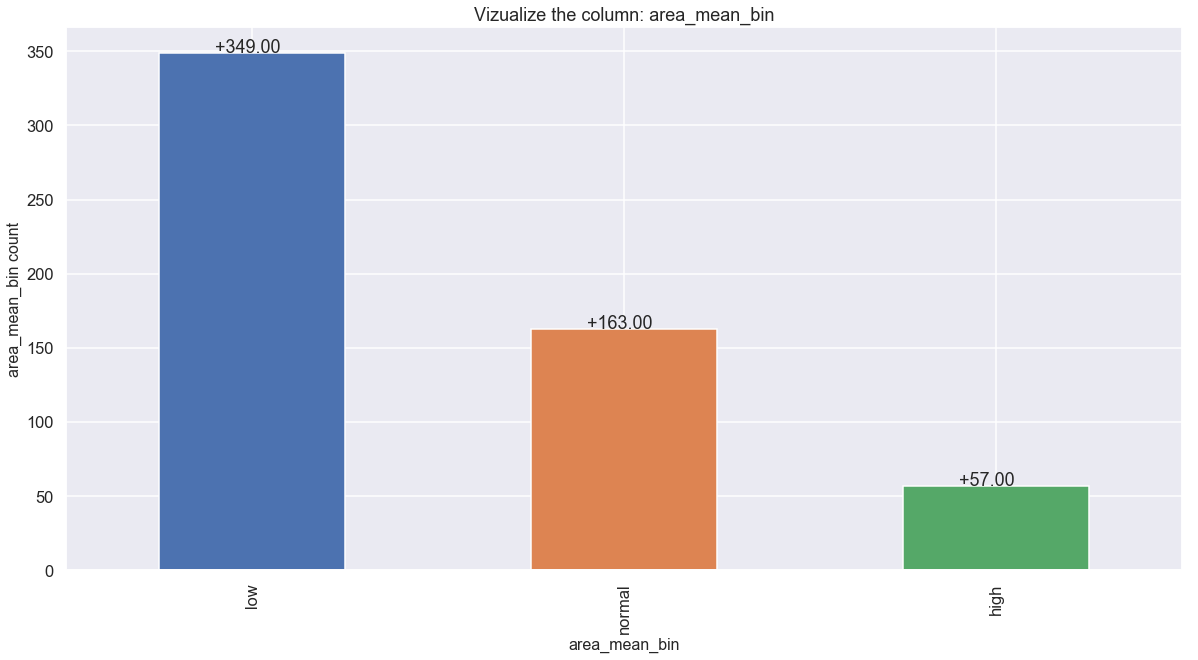

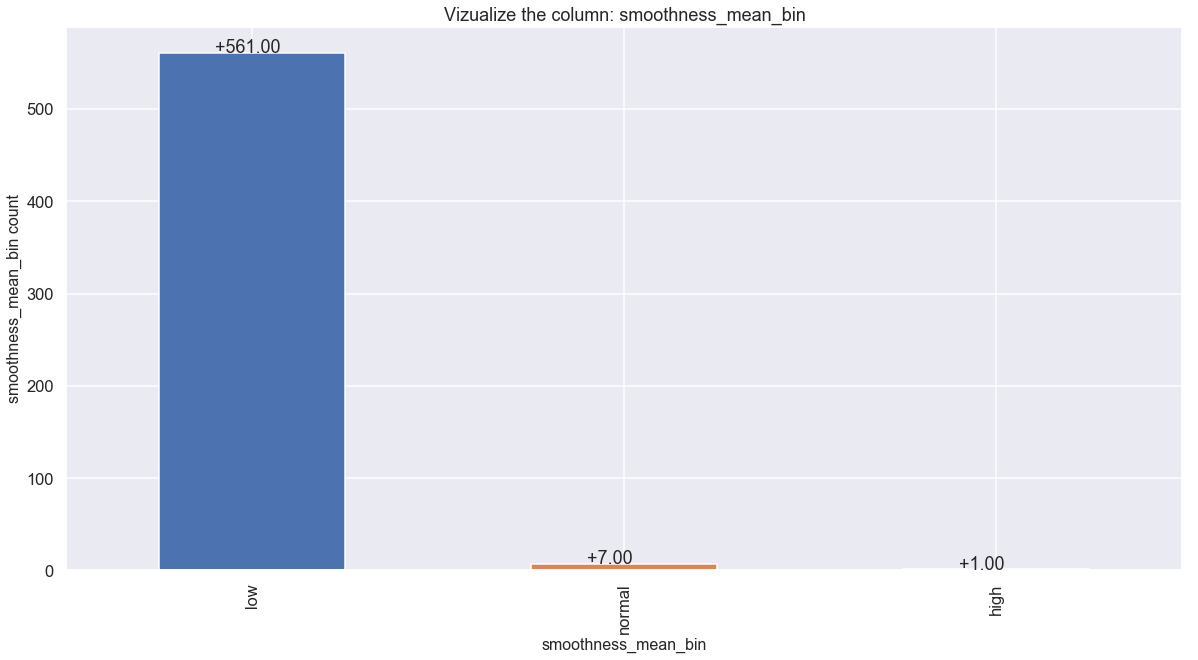

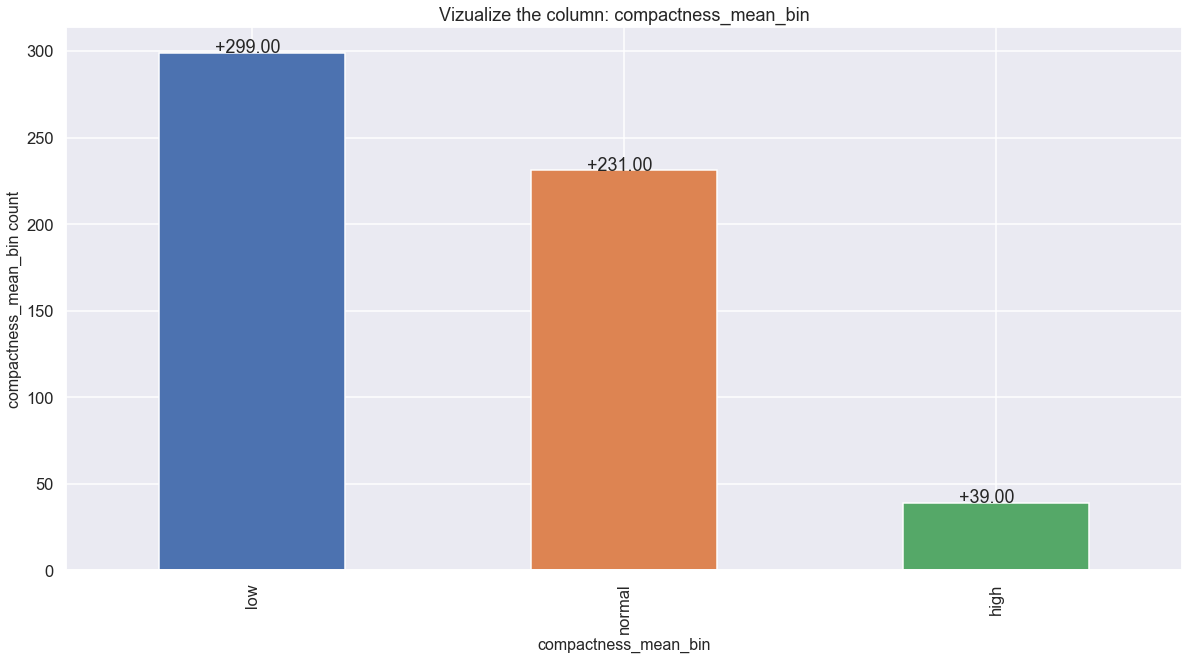

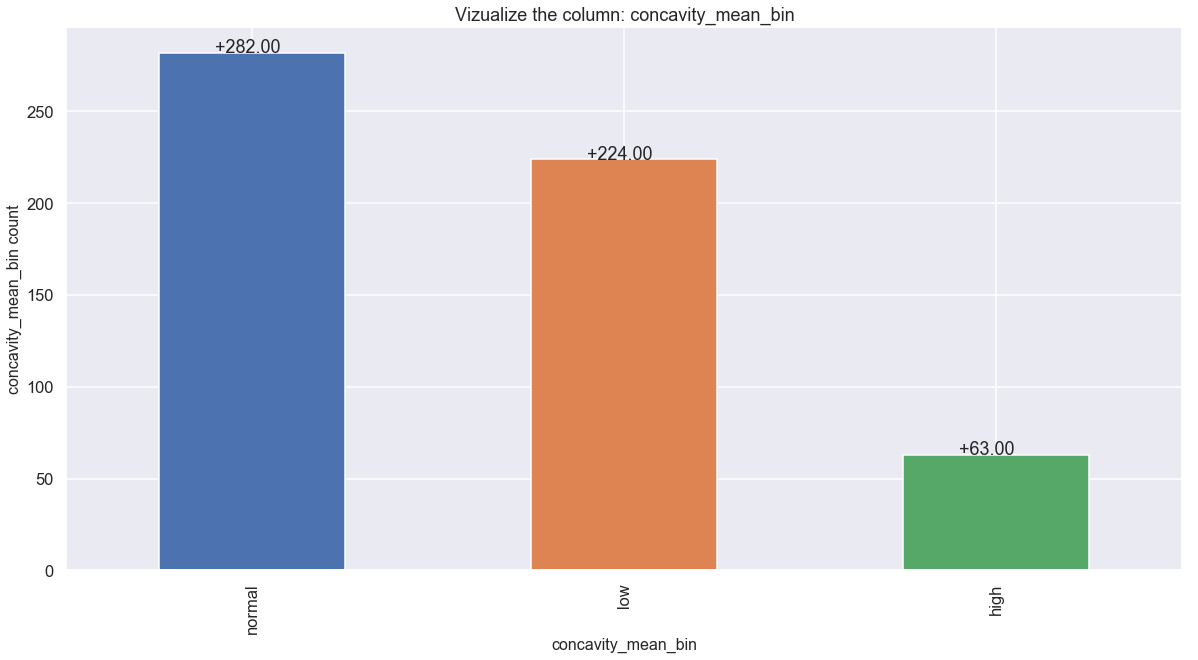

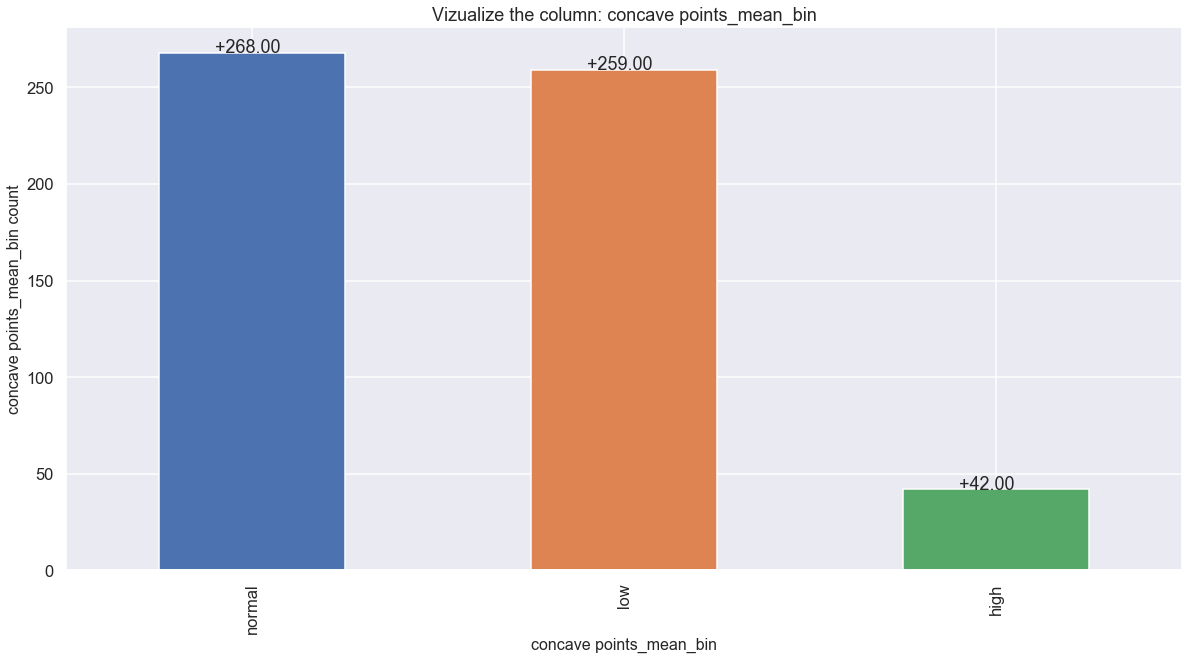

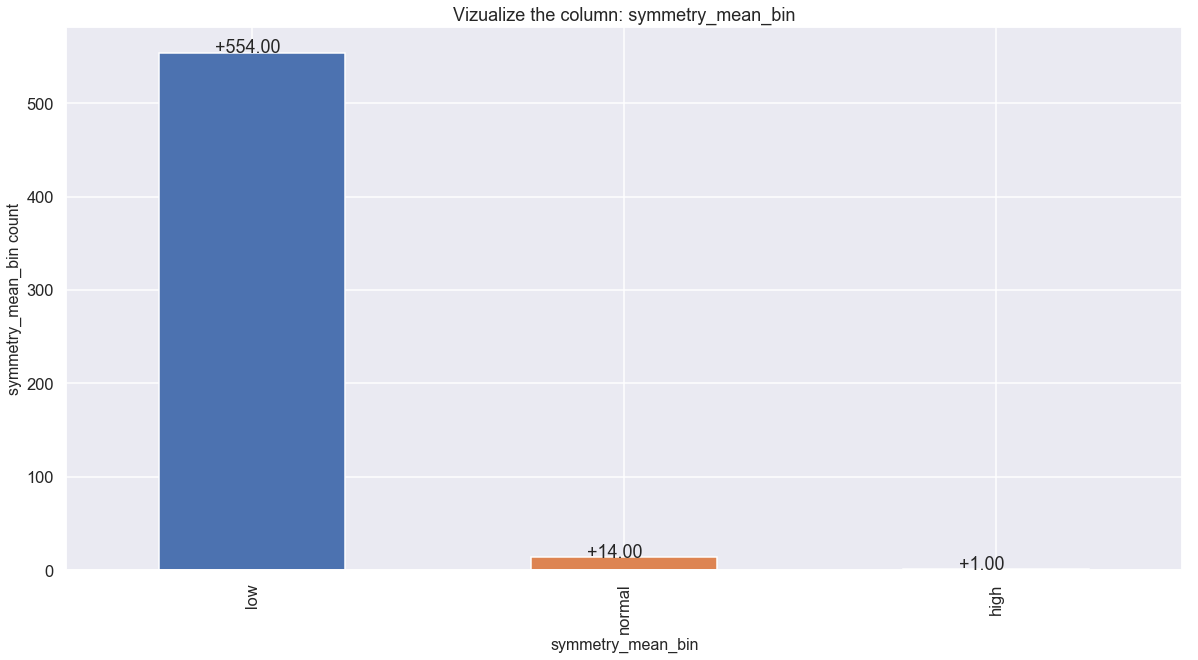

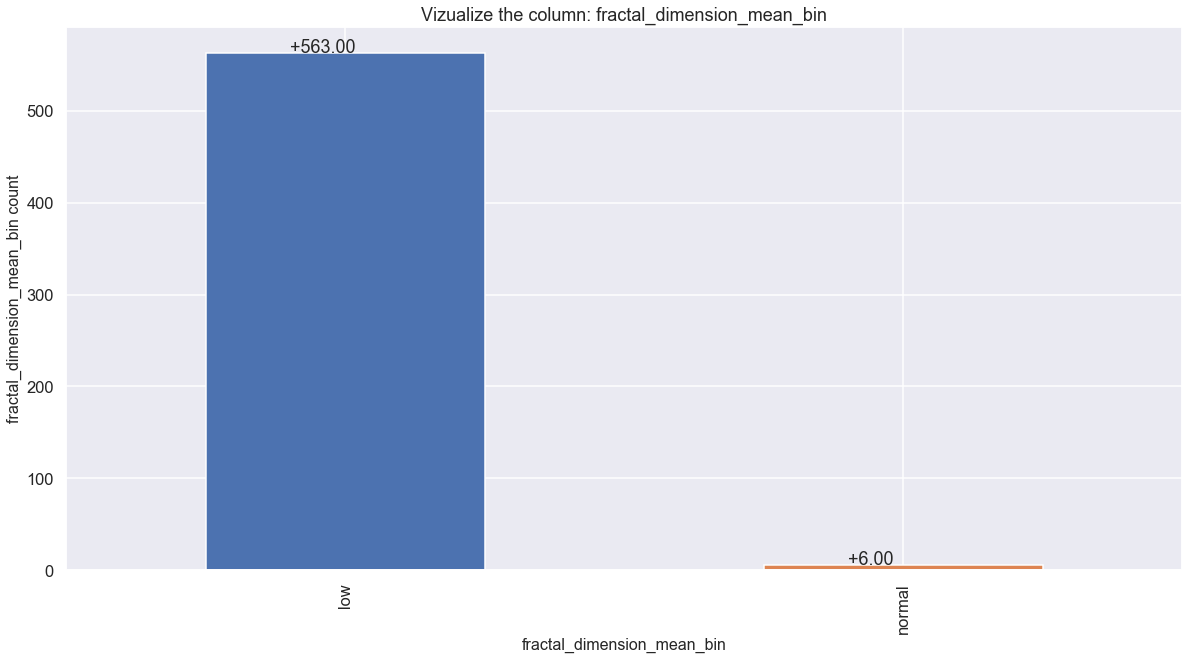

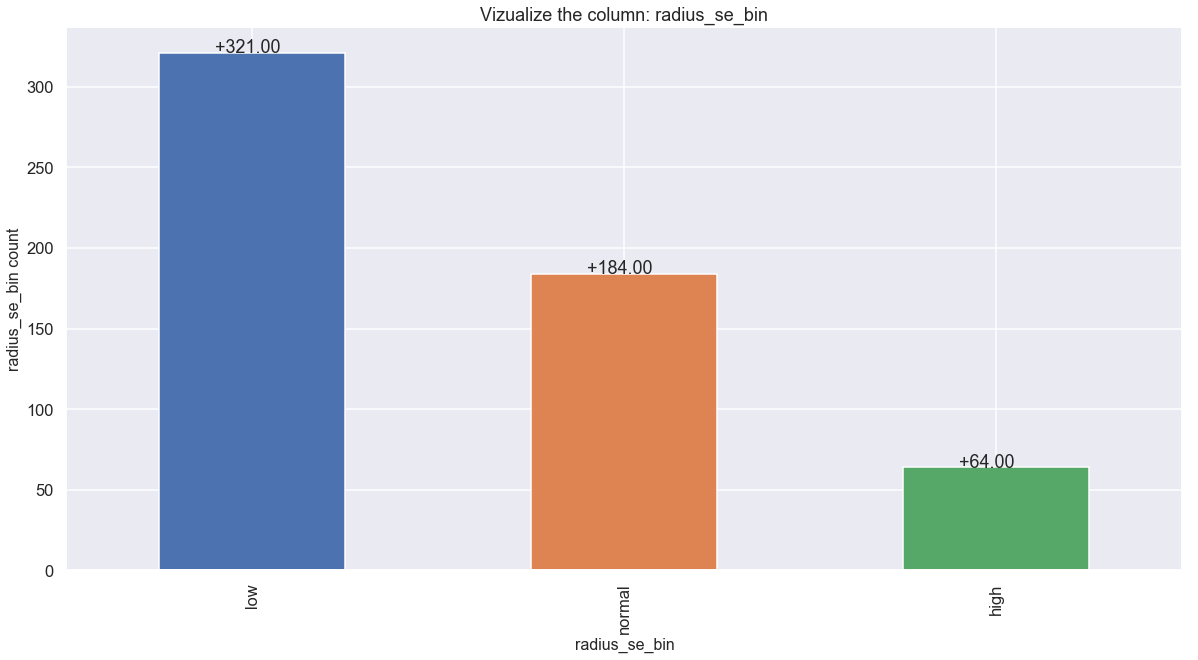

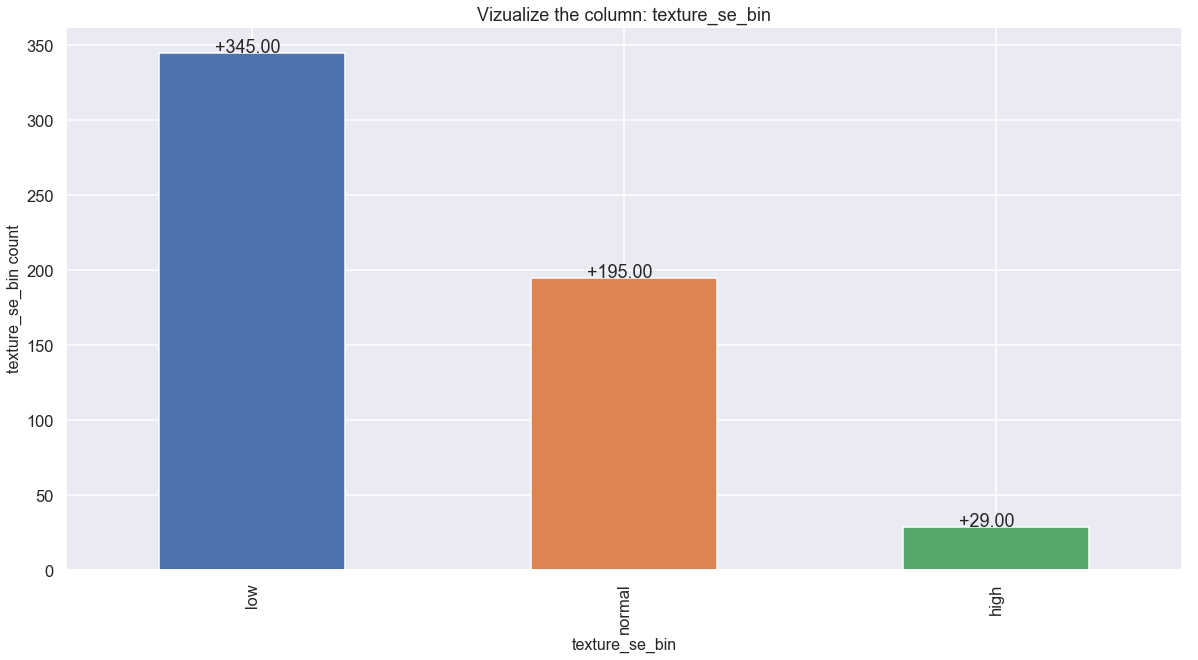

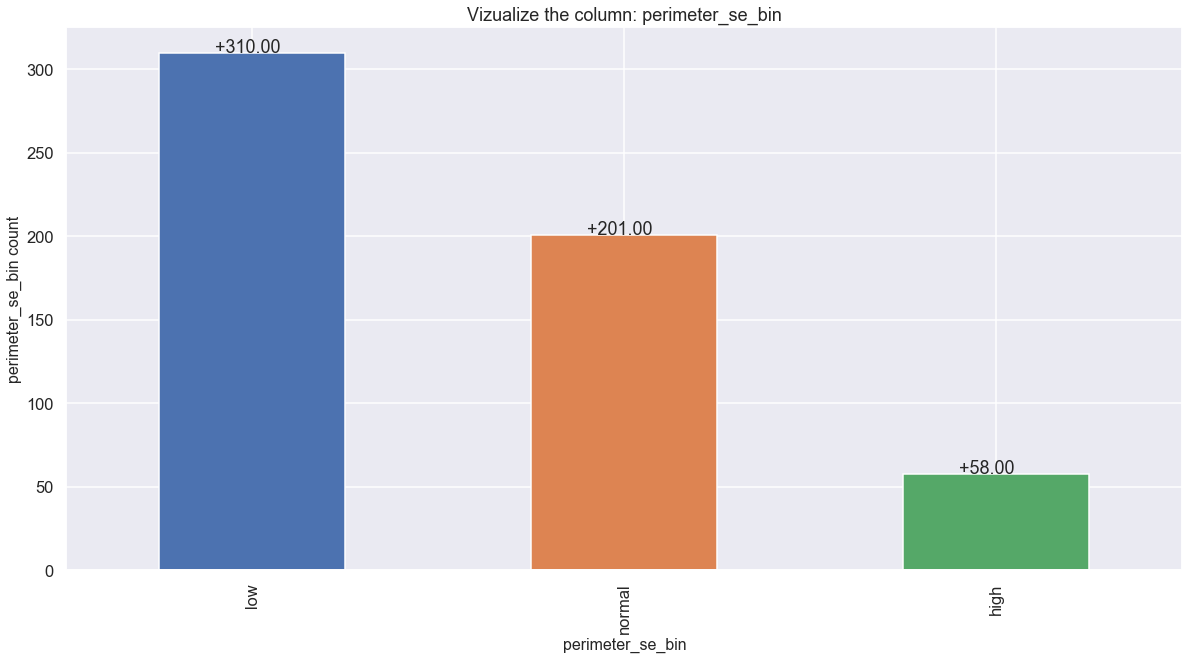

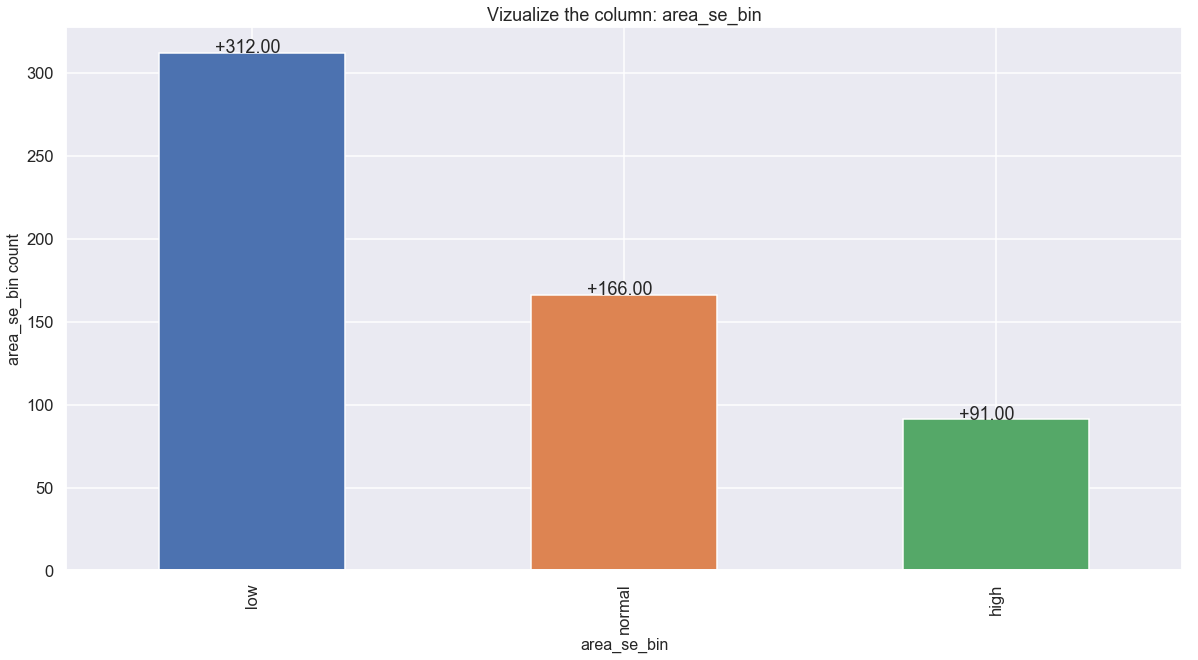

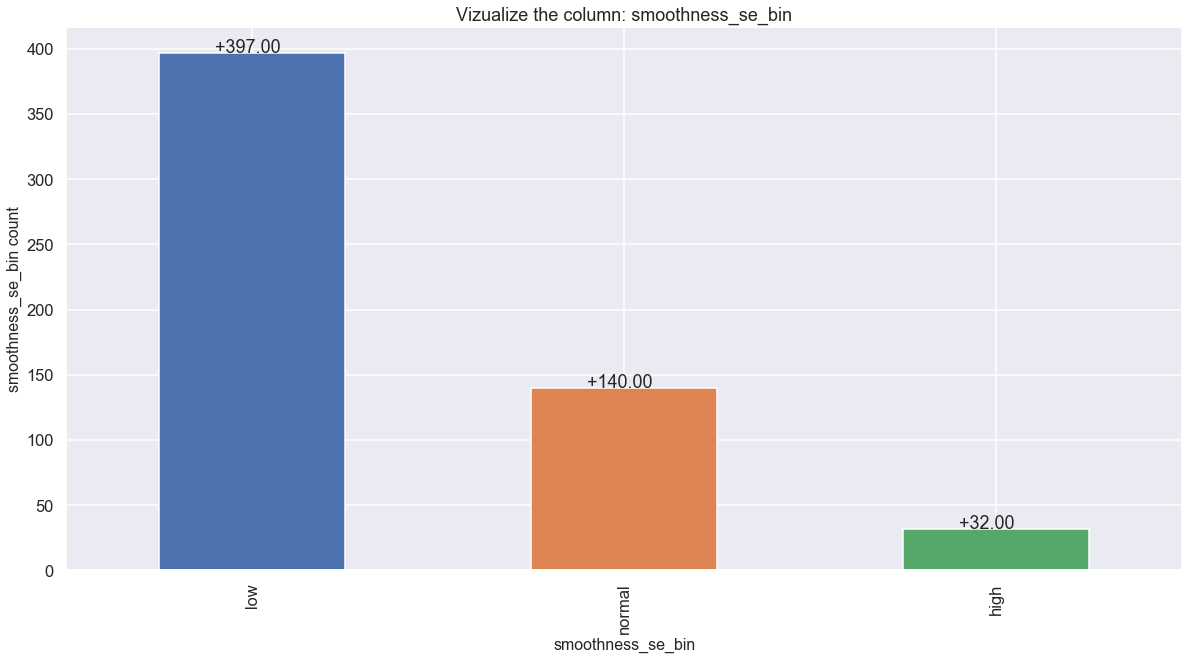

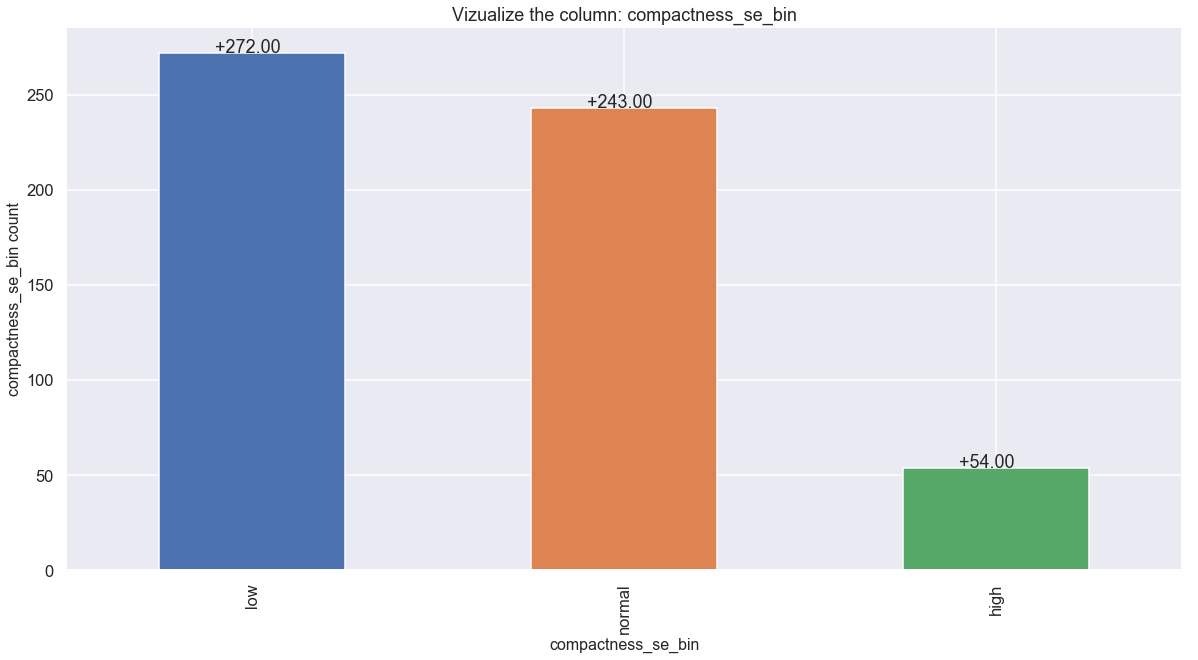

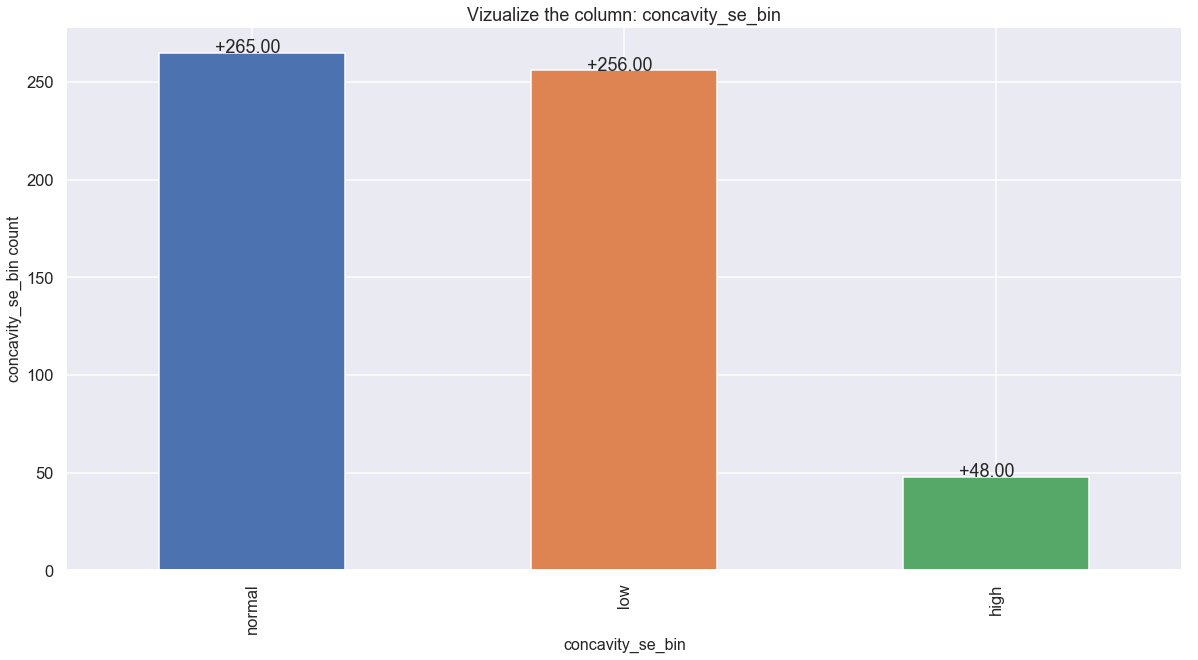

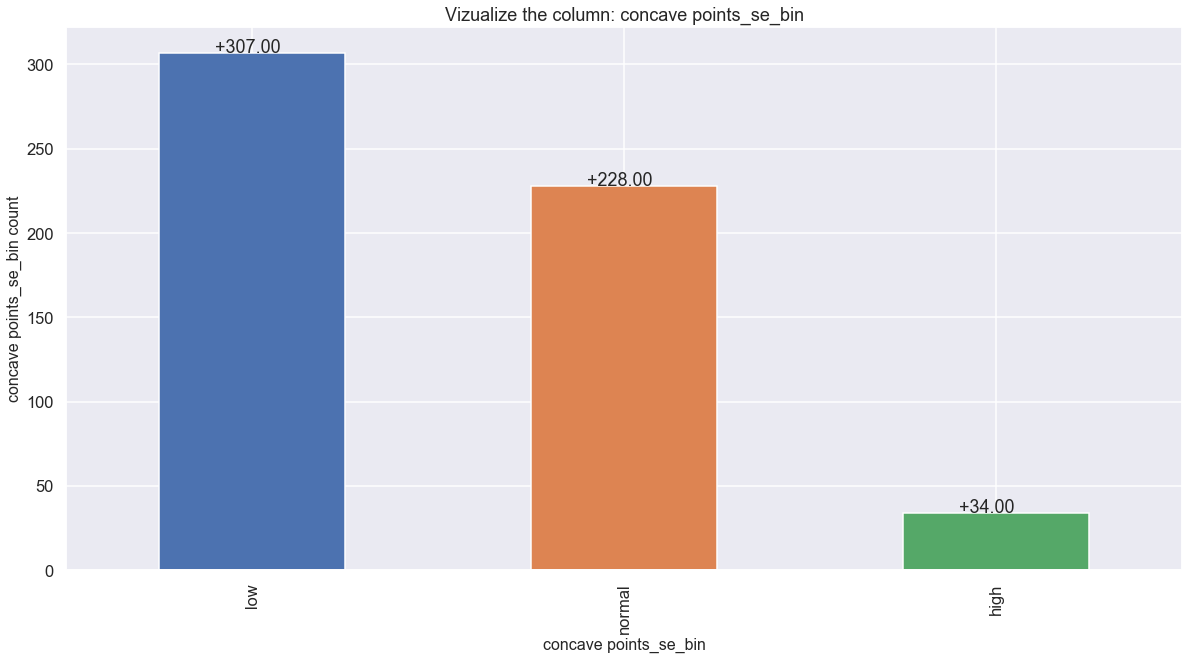

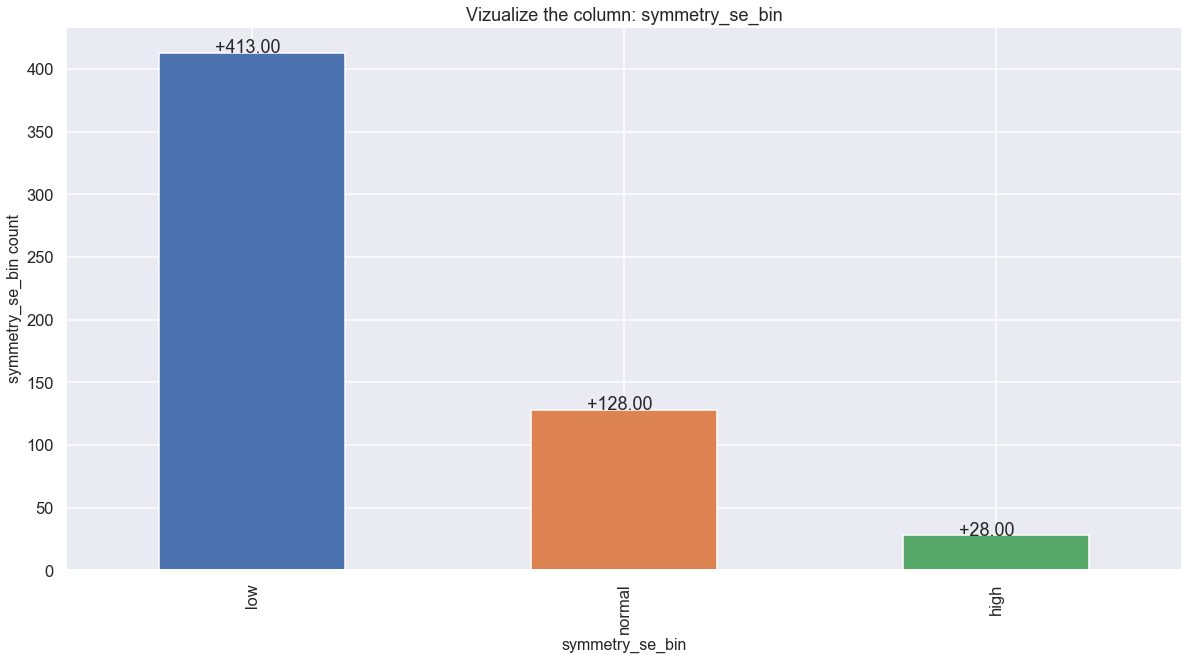

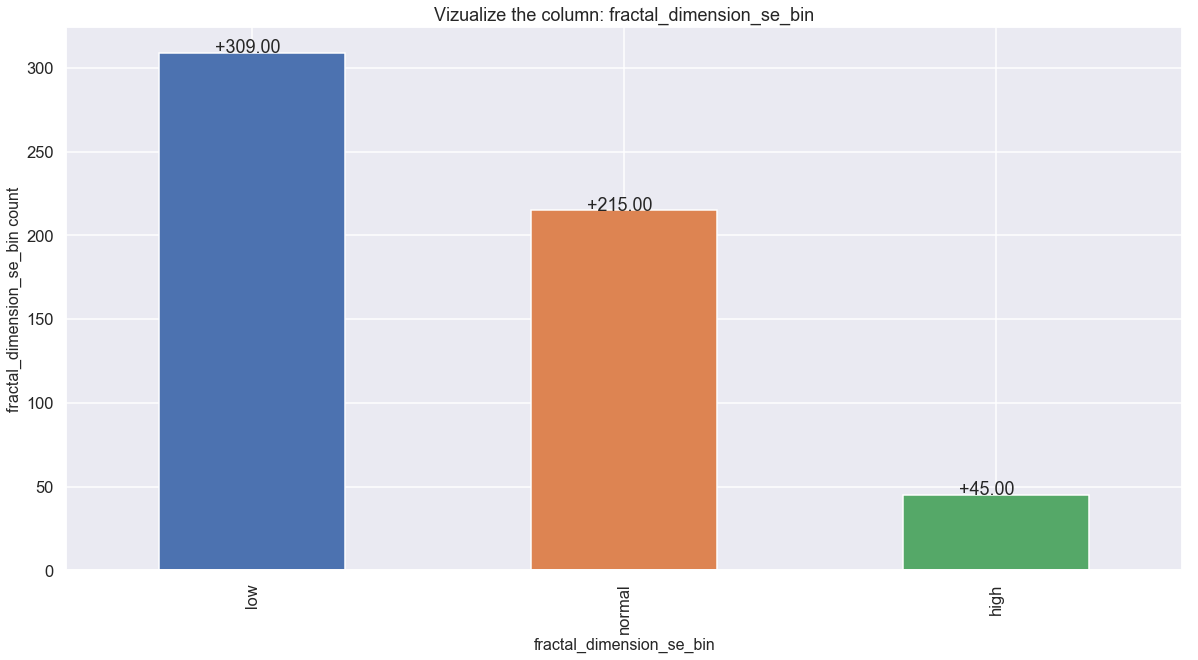

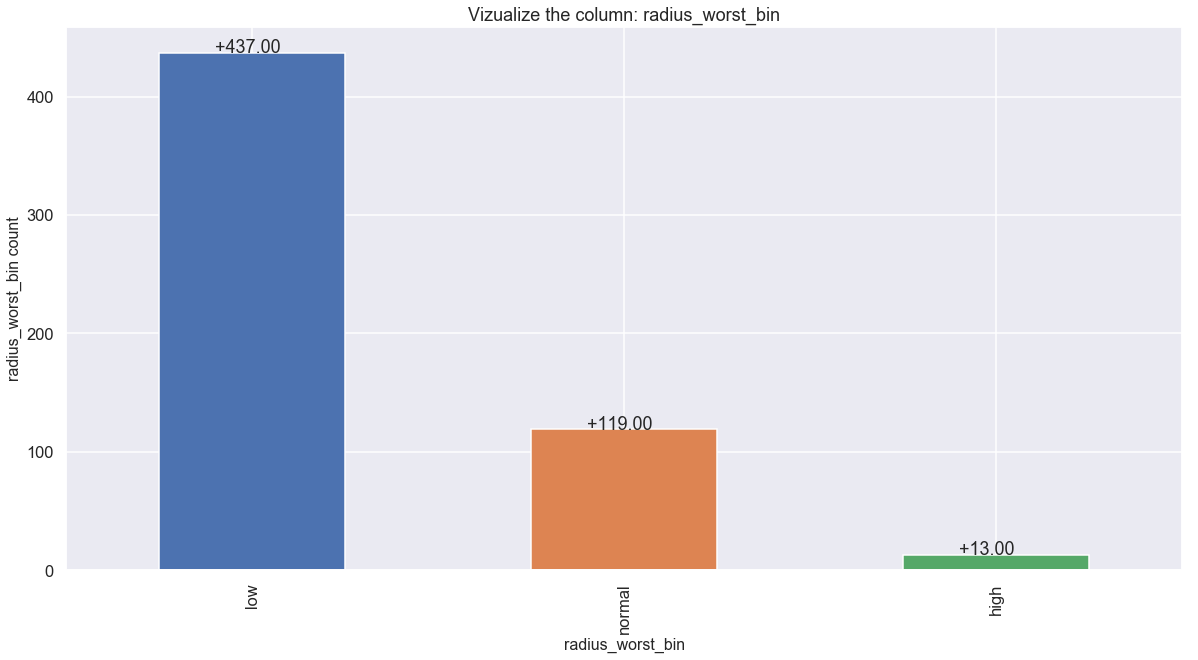

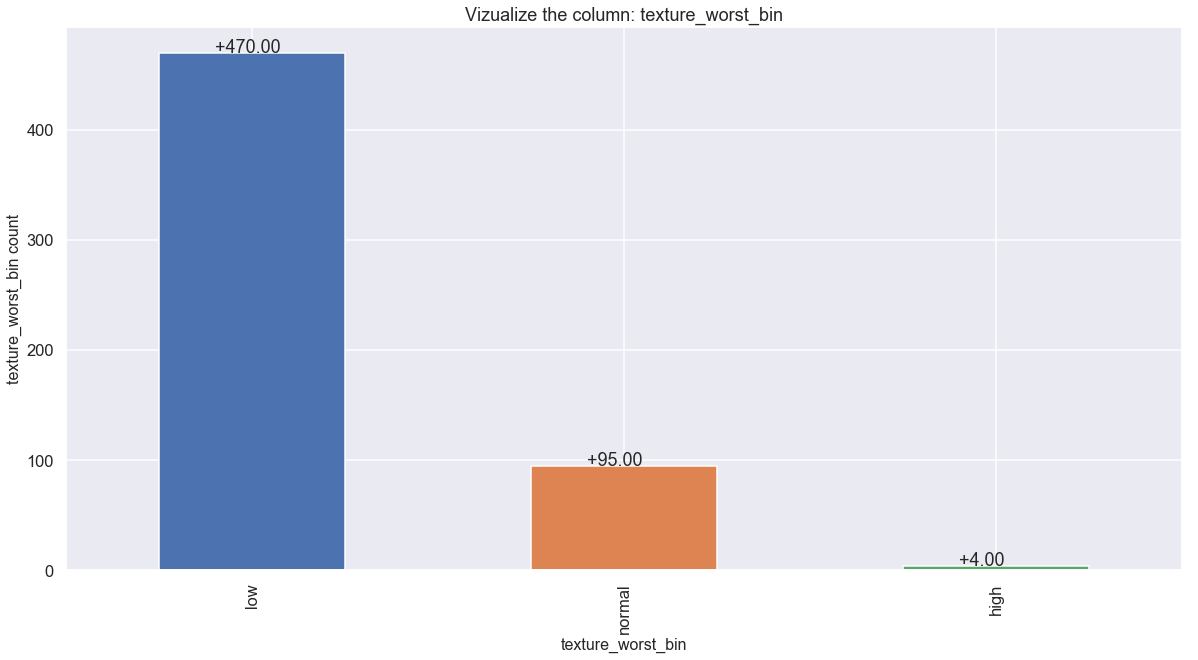

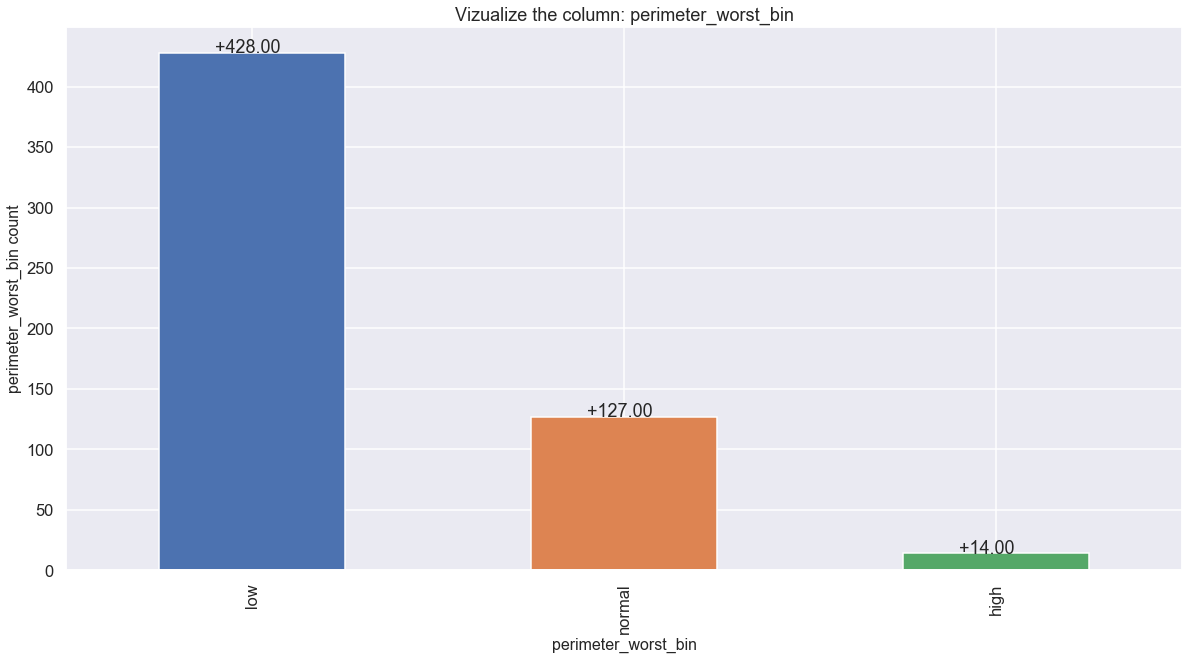

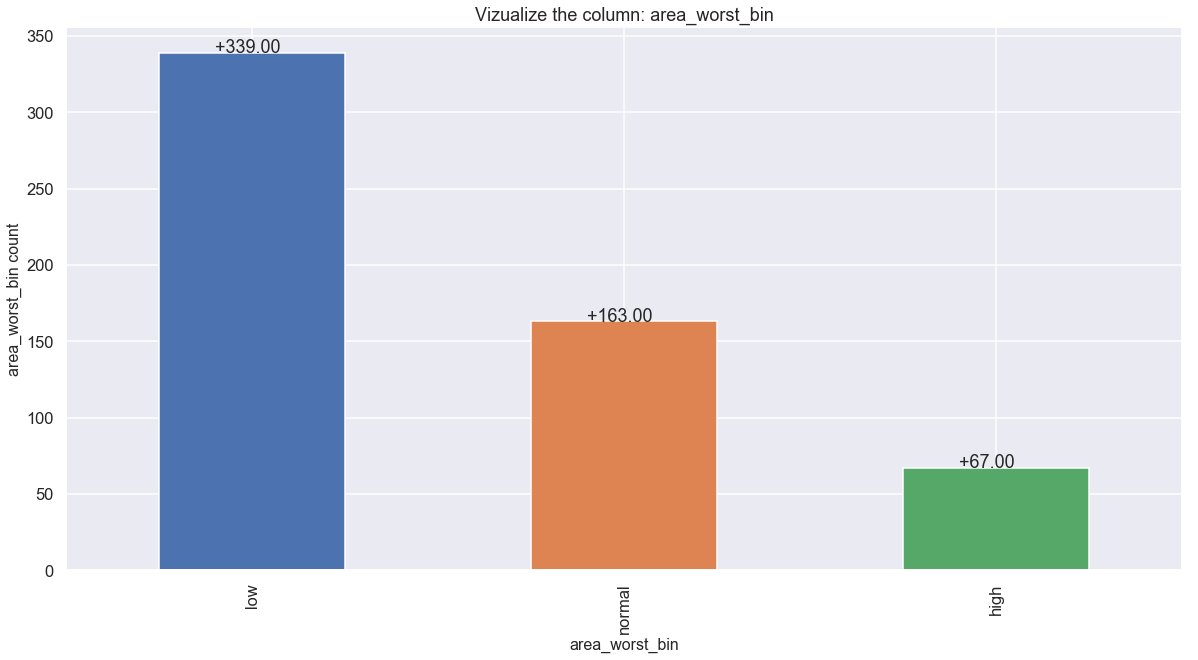

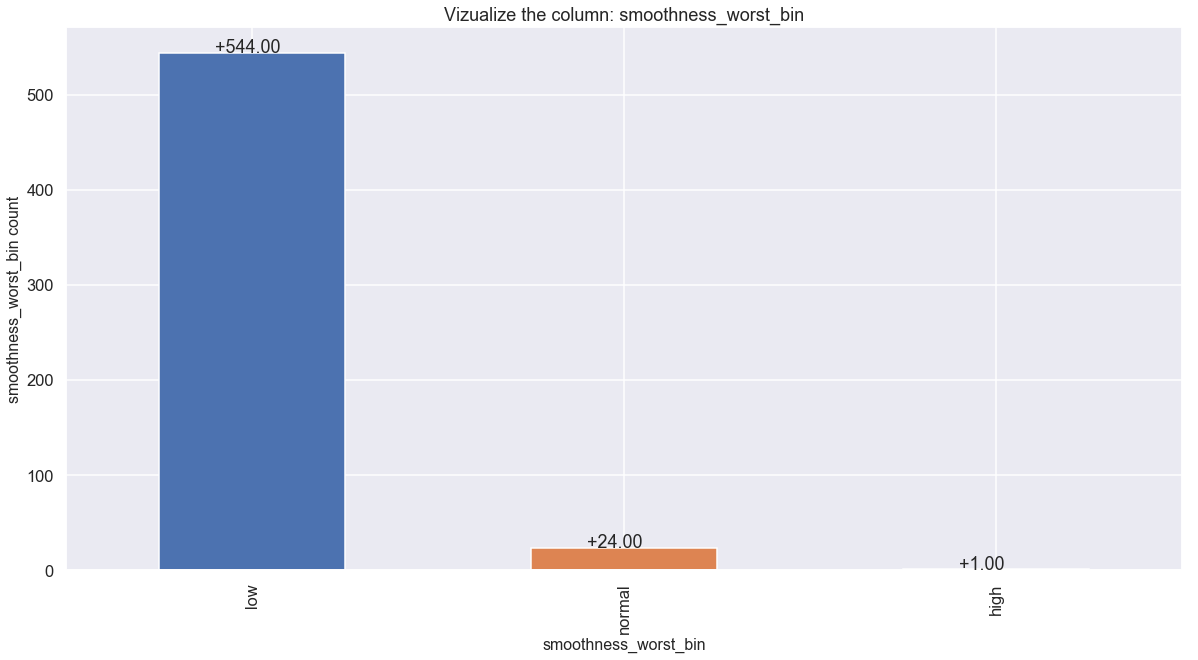

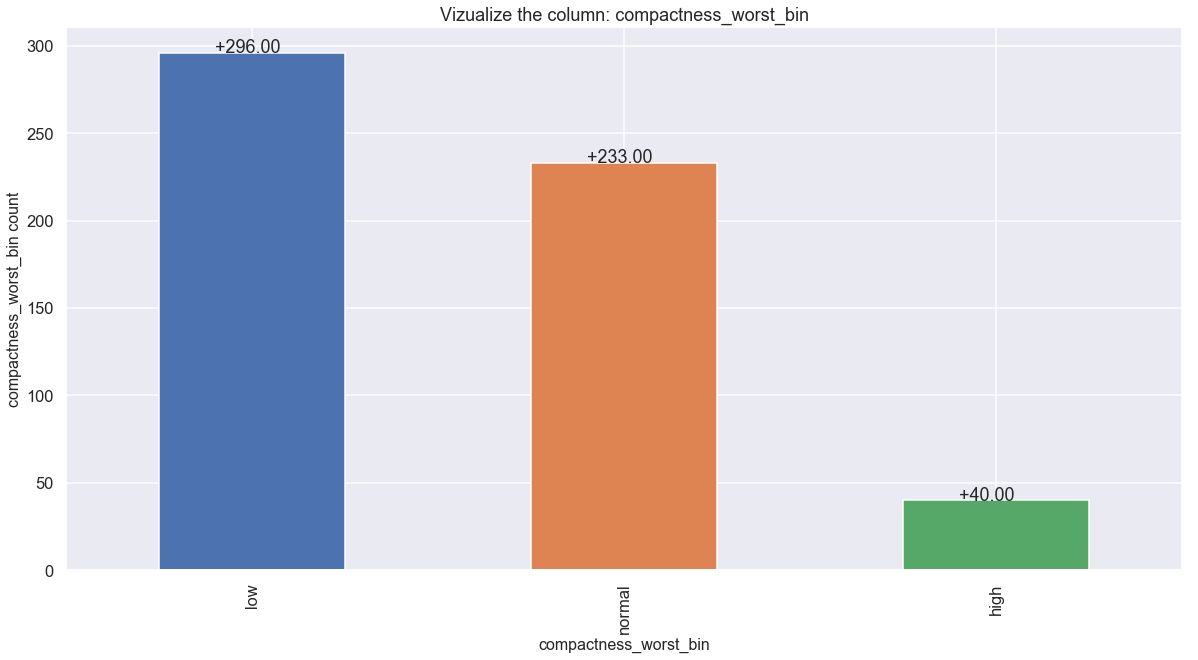

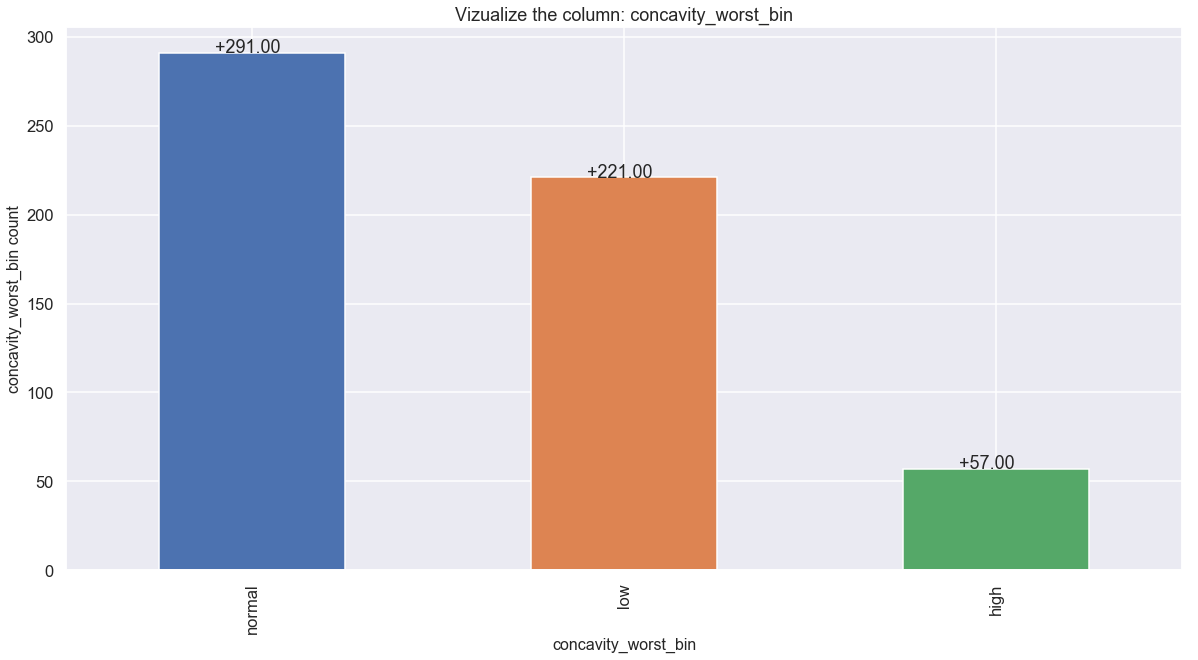

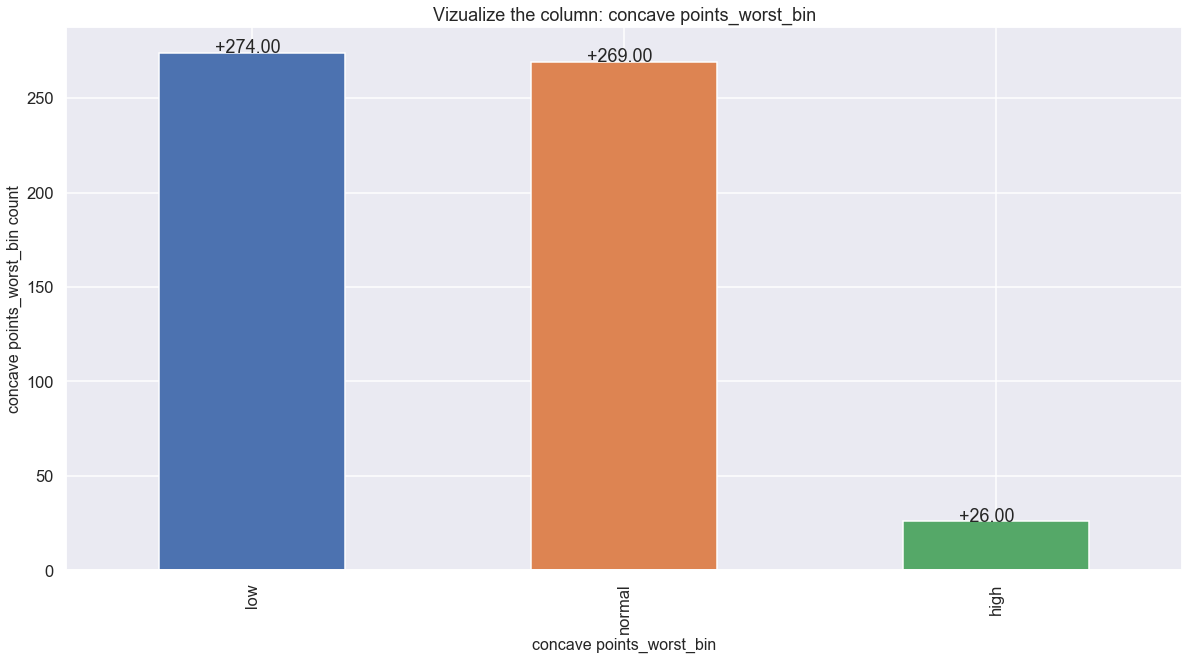

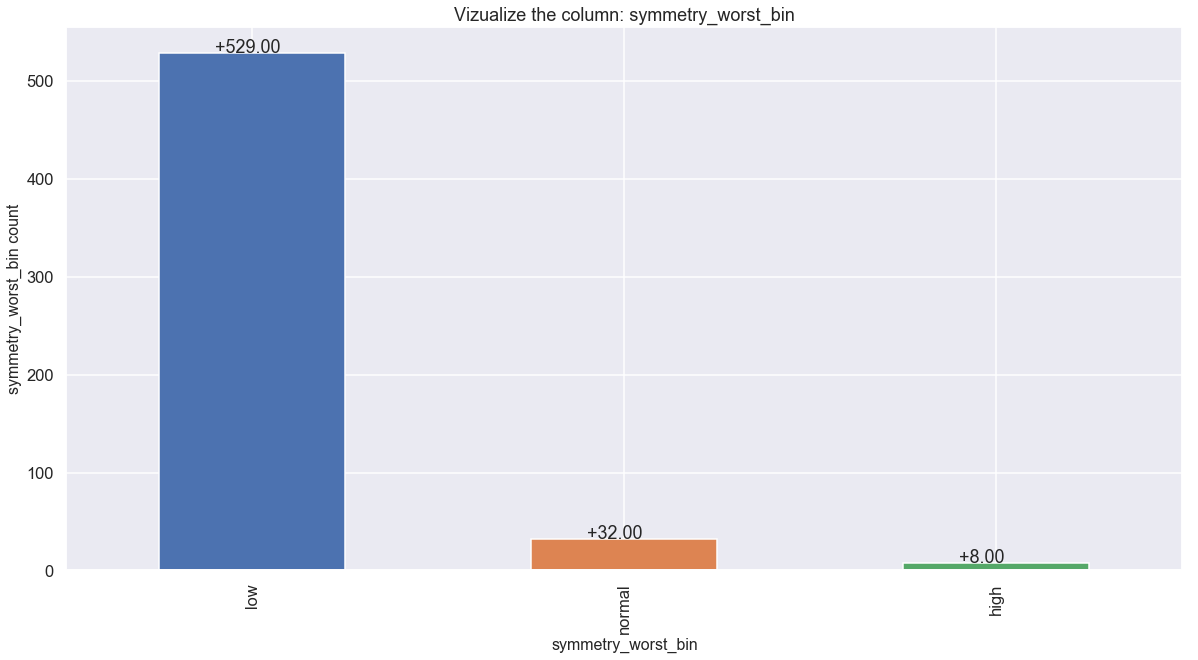

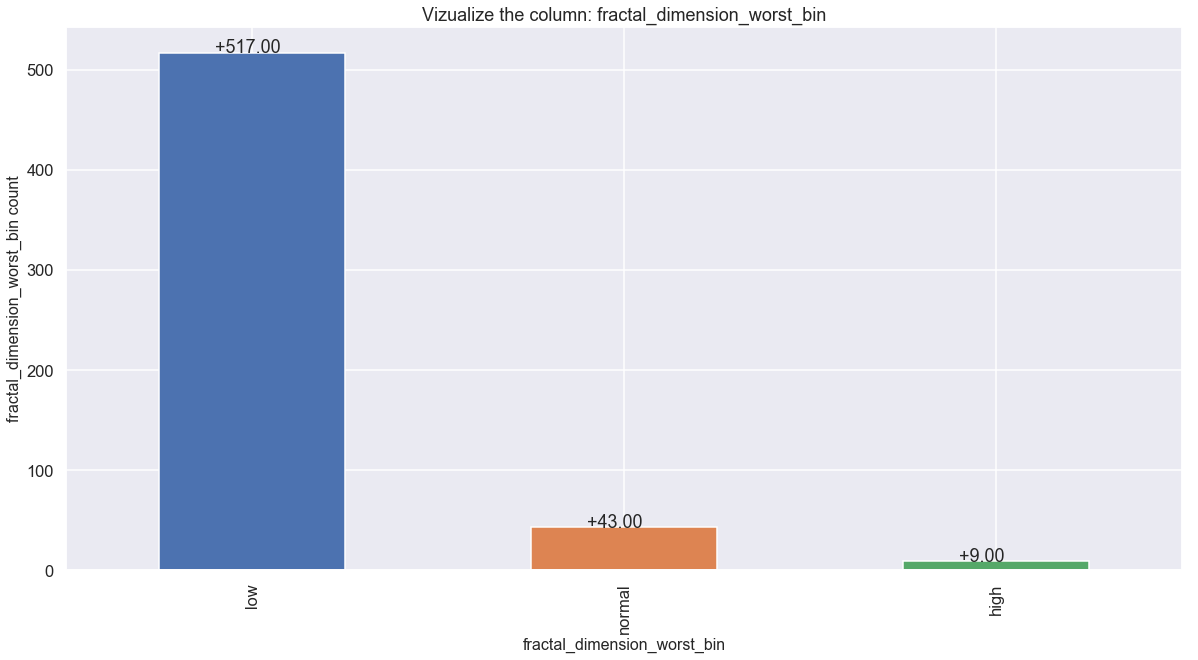

In [20]:
## Vizualize the categorical variables in the dataset | Start
cols=list(df.columns)
for col in cols:
    if((df[col].dtype=='object') and col!='id' and col!='diagnosis'):
        pltTitle = 'Vizualize the column: ' + col
        xLabel = col
        yLabel = col + ' count'
        plotbar(df[col].value_counts(),pltTitle,xLabel,yLabel)

## Vizualize the categorical variables in the dataset | End

### Comments

Though we can see that mostly are Low or in normal range but still we can see there are Highs for some parameters, we will further see that how these parameters impacts the diagnosis in next section

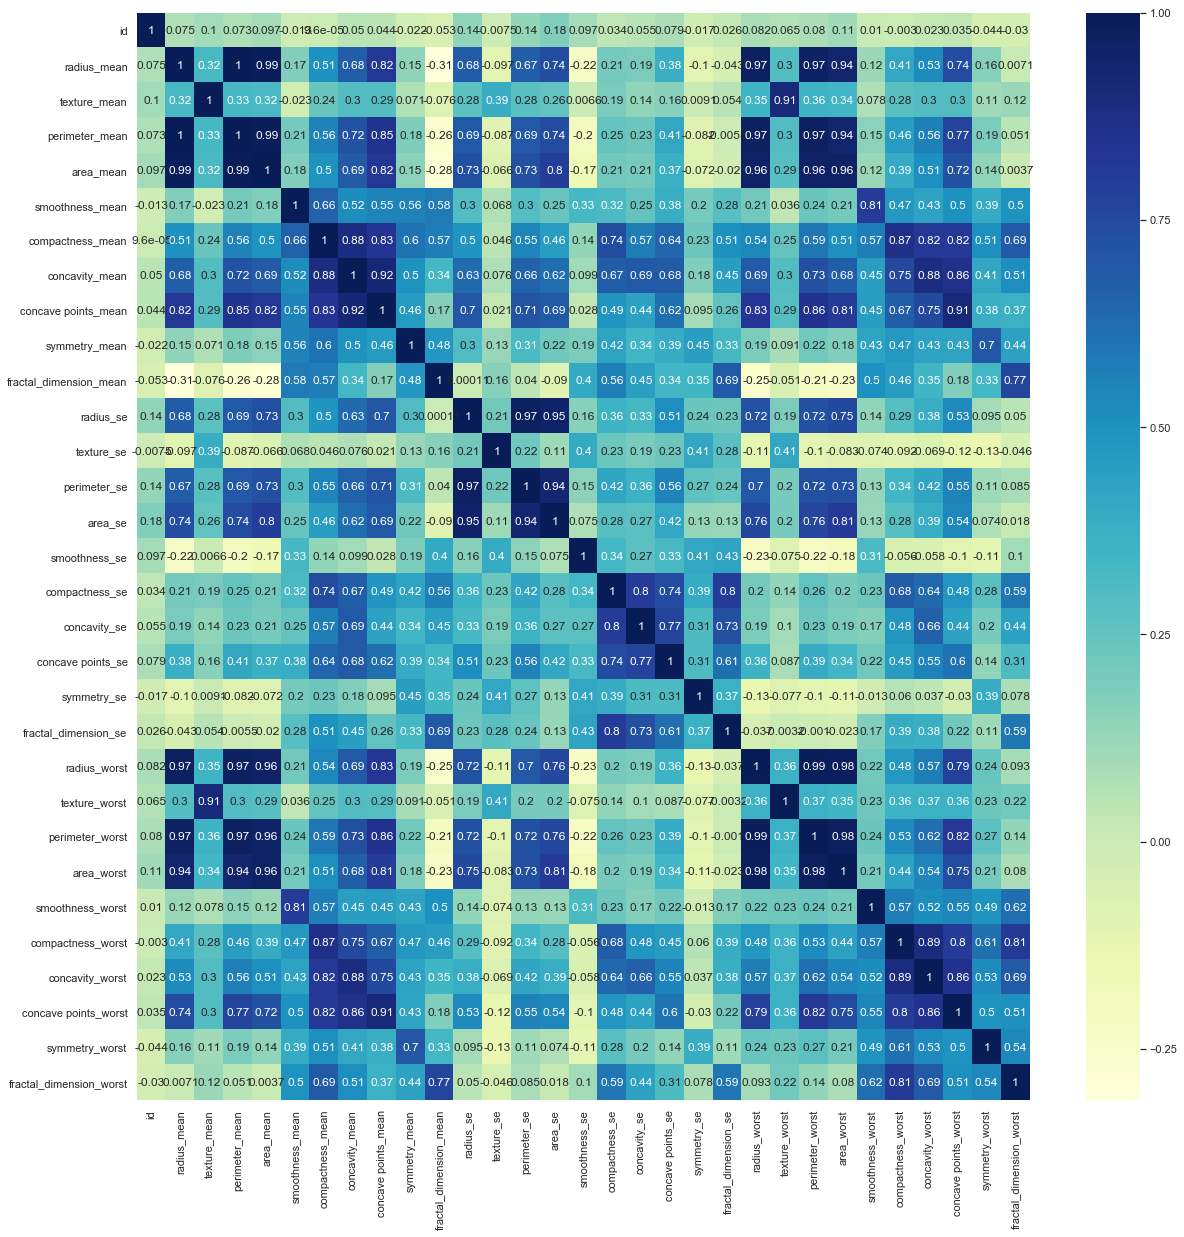

In [21]:
## Correlation between the variables | Start
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(breastData.corr(),cmap='YlGnBu',annot=True)
plt.show()

There is a high degree of correlations between the variablesso we remove the highly correlated ones

In [22]:
breastData=breastData.drop(['fractal_dimension_worst', 'symmetry_worst','concave points_worst',
                            'concave points_se', 'fractal_dimension_se', 'concavity_worst',
                            'smoothness_worst','concavity_mean', 'area_se', 'radius_mean',
                            'compactness_se','area_worst', 'concave points_mean', 
                            'perimeter_mean','compactness_mean','area_mean', 
                            'radius_worst', 'perimeter_worst','compactness_worst', 
                            'texture_mean','radius_se'],axis=1)

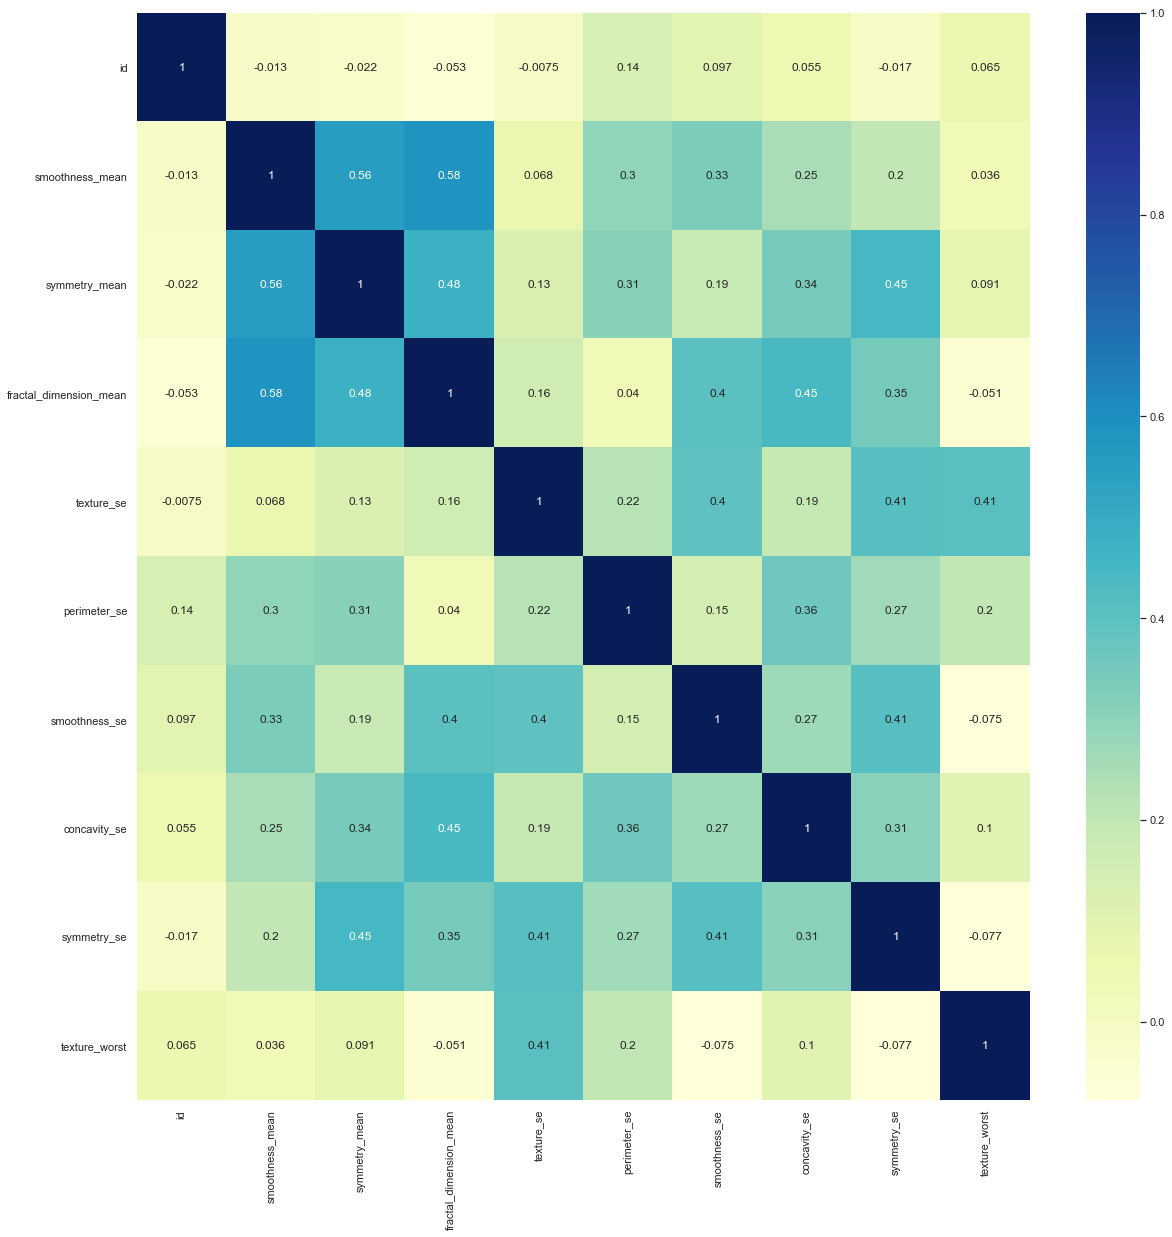

In [23]:
## Correlation between the variables | Start
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(breastData.corr(),cmap='YlGnBu',annot=True)
plt.show()

We have reduced the multicollinearity and now ready for the model

In [24]:
breastData.diagnosis=breastData.diagnosis.apply(lambda x: 1 if x=='M' else 0)

In [25]:
breastData.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [26]:
breastData.head()

,id,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,concavity_se,symmetry_se,texture_worst
0,842302,1,0.11840,0.2419,0.07871,0.9053,8.589,0.006399,0.05373,0.03003,17.33
1,842517,1,0.08474,0.1812,0.05667,0.7339,3.398,0.005225,0.01860,0.01389,23.41
2,84300903,1,0.10960,0.2069,0.05999,0.7869,4.585,0.006150,0.03832,0.02250,25.53
3,84348301,1,0.14250,0.2597,0.09744,1.1560,3.445,0.009110,0.05661,0.05963,26.50
4,84358402,1,0.10030,0.1809,0.05883,0.7813,5.438,0.011490,0.05688,0.01756,16.67


In [27]:
breastData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
id                        569 non-null int64
diagnosis                 569 non-null int64
smoothness_mean           569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
texture_se                569 non-null float64
perimeter_se              569 non-null float64
smoothness_se             569 non-null float64
concavity_se              569 non-null float64
symmetry_se               569 non-null float64
texture_worst             569 non-null float64
dtypes: float64(9), int64(2)
memory usage: 49.0 KB


In [28]:

for col in breastData.columns:
    if(col!='id' and col!='diagnosis'):
        mean = df[col].mean()
        std = df[col].std()
        breastData[col]=breastData[col].apply(lambda x: (x-mean)/std)

In [29]:
X = breastData.drop(['id', 'diagnosis'],axis=1)
y=breastData.diagnosis

In [30]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

In [31]:
X_train,X_test,y_train,y_test = train_test_split(breastData,y,train_size=0.7,test_size=0.3,random_state=100)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 18 to 520
Data columns (total 11 columns):
id                        398 non-null int64
diagnosis                 398 non-null int64
smoothness_mean           398 non-null float64
symmetry_mean             398 non-null float64
fractal_dimension_mean    398 non-null float64
texture_se                398 non-null float64
perimeter_se              398 non-null float64
smoothness_se             398 non-null float64
concavity_se              398 non-null float64
symmetry_se               398 non-null float64
texture_worst             398 non-null float64
dtypes: float64(9), int64(2)
memory usage: 37.3 KB


In [33]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

In [34]:
X_train=X_train.drop(['id','diagnosis'],axis=1)
X_test=X_test.drop(['id','diagnosis'],axis=1)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 18 to 520
Data columns (total 9 columns):
smoothness_mean           398 non-null float64
symmetry_mean             398 non-null float64
fractal_dimension_mean    398 non-null float64
texture_se                398 non-null float64
perimeter_se              398 non-null float64
smoothness_se             398 non-null float64
concavity_se              398 non-null float64
symmetry_se               398 non-null float64
texture_worst             398 non-null float64
dtypes: float64(9)
memory usage: 31.1 KB


In [36]:
y_train[:5]

18     1
213    1
532    0
191    0
235    0
Name: diagnosis, dtype: int64

In [37]:
import statsmodels.api as sm
X_train_cons = sm.add_constant(X_train)
logisReg = sm.GLM(y_train,X_train_cons,family=sm.families.Binomial())
#logisReg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())


In [38]:
res=logisReg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                            GLM   Df Residuals:                      388
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 20 Jun 2019   Deviance:                          nan
Time:                        00:17:14   Pearson chi2:                     219.
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2237      0.348     -3.517      0.000      -1.906      -0.542
smoothness_mean            3.2554      0.640      5.089      0.000       2.002       4.509
symmetry_mean              0.7966      0.454      1.754      0.079      -0.094       1.687
fractal_dimension_mean    -2.5568      0.579     -4.416      0.000      -3.692      -1.422
texture_se                -2.4332      0.520     -4.678      0.000      -3.453      -1.414
perimeter_se               4.9473      0.842      5.874      0.000       3.296       6.598
smoothness_se             -0.4742      0.316     -1.499      0.134      -1.094       0.146
concavity_se               1.0781      0.291      3.710      0.000       0.509       1.648
symmetry_se               -0.5753      0.399     -1.441      0.150      -1.358       0.207
texture_worst              3.6225      0.549      6.603      0.000       2.547       4.698
==========================================================================================
"""

### We do not need RFE as the number of features are already less, we will check the significance using p values and VIF of the features

In [39]:
X_train.head()

,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,concavity_se,symmetry_se,texture_worst
18,0.138631,-0.837588,-1.253138,-0.362284,1.483262,-0.182173,0.066795,-0.844663,0.846495
213,0.301456,-1.837067,-0.586034,0.816003,0.445601,8.022940,3.707217,0.146098,0.389306
532,-0.255279,-0.658849,-0.176706,-1.335549,-0.738460,-1.070095,-0.822092,-1.209999,-0.891148
191,-0.630703,-0.429041,0.010253,0.962835,1.113800,-0.822636,-0.335708,1.595343,-0.354236
235,-0.402462,-1.074690,-0.629941,0.518712,-0.593049,0.115910,-0.814671,-0.957167,0.748875


In [40]:
## Predict the model ##
y_train_pred=res.predict(X_train_cons)

In [41]:
y_train_pred[:10]

18     0.999999
213    0.821958
532    0.004311
191    0.065978
235    0.025451
471    0.380084
485    0.504866
153    0.000176
357    0.001091
412    0.000031
dtype: float64

In [42]:
y_train_pred=y_train_pred.values.reshape(-1)

In [43]:
y_train_pred_final=pd.DataFrame({'id':y_train.index,'diagnosis':y_train.values,'diagnosis_prob':y_train_pred})

In [44]:
y_train_pred_final.head()

,id,diagnosis,diagnosis_prob
0,18,1,0.999999
1,213,1,0.821958
2,532,0,0.004311
3,191,0,0.065978
4,235,0,0.025451


In [45]:
cutoff_df=pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])

number = [float(x)/10 for x in range(10)]
for num in number:
    y_train_pred_final[num]=y_train_pred_final.diagnosis_prob.apply(lambda x: 1 if x>=num else 0)
    cm=metrics.confusion_matrix(y_train_pred_final['diagnosis'],y_train_pred_final[num])
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    Accuracy = (TP + TN)/(TP+TN+FP+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(TN+FP)
    cutoff_df.loc[num]=[num,Accuracy,Sensitivity,Specificity]

In [46]:
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.359296,1.000000,0.000000
0.1,0.1,0.889447,0.972028,0.843137
0.2,0.2,0.912060,0.944056,0.894118
0.3,0.3,0.937186,0.944056,0.933333
0.4,0.4,0.959799,0.944056,0.968627
0.5,0.5,0.962312,0.937063,0.976471
0.6,0.6,0.964824,0.923077,0.988235
0.7,0.7,0.954774,0.888112,0.992157
0.8,0.8,0.934673,0.825175,0.996078
0.9,0.9,0.922111,0.790210,0.996078


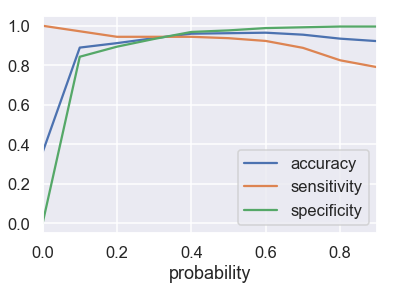

In [47]:
## Plot the graph to find the optimal cutoff point \ Start
sns.set_style("darkgrid")
sns.set_context('talk')
cutoff_df.plot.line(x='probability',y=['accuracy','sensitivity','specificity'])
plt.show()
## Plot the graph to find the optimal cutoff point \ End

In [48]:
y_train_pred_final['predicted diagnosis']=y_train_pred_final.diagnosis_prob.apply(lambda x: 1 if x>=0.3 else 0)

In [49]:
y_train_pred_final.head()

,id,diagnosis,diagnosis_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted diagnosis
0,18,1,0.999999,1,1,1,1,1,1,1,1,1,1,1
1,213,1,0.821958,1,1,1,1,1,1,1,1,1,0,1
2,532,0,0.004311,1,0,0,0,0,0,0,0,0,0,0
3,191,0,0.065978,1,0,0,0,0,0,0,0,0,0,0
4,235,0,0.025451,1,0,0,0,0,0,0,0,0,0,0


In [50]:
confusion_matrix=metrics.confusion_matrix(y_train_pred_final['diagnosis'],y_train_pred_final['predicted diagnosis'])

In [51]:
confusion_matrix

array([[238,  17],
       [  8, 135]])

In [52]:
TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [53]:
Accuracy = (TP + TN)/(TP+TN+FP+FN)

In [65]:
round(Accuracy,2)*100

94.0

In [55]:
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)

In [66]:
print("Sensitivity="+str(round(Sensitivity,2)*100))
print("Specificity="+str(round(Specificity,2)*100))

Sensitivity=94.0
Specificity=93.0


### VIF

In [57]:
X_train.values

array([[ 0.13863062, -0.83758763, -1.25313813, ...,  0.06679519,
        -0.84466307,  0.84649507],
       [ 0.30145621, -1.83706668, -0.5860336 , ...,  3.70721725,
         0.14609811,  0.3893063 ],
       [-0.25527933, -0.65884867, -0.17670619, ..., -0.82209192,
        -1.2099987 , -0.89114768],
       ...,
       [-1.47540473, -0.51293932, -0.77724191, ..., -0.85949329,
         0.19569665, -0.96598997],
       [ 0.21186659, -0.34149584, -0.40049073, ..., -0.37049274,
        -0.37045259, -0.13947076],
       [ 2.89671129,  1.40576864,  2.00590119, ..., -0.32875162,
         2.35020906, -1.27512117]])

In [58]:
vif_df=pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
#|vif_df['vif'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]



In [59]:
vif_df=vif_df.sort_values(by='vif',ascending=False)
vif_df

,Features,vif
2,fractal_dimension_mean,2.052535
0,smoothness_mean,2.001266
7,symmetry_se,1.902237
3,texture_se,1.868010
1,symmetry_mean,1.777604
5,smoothness_se,1.570591
4,perimeter_se,1.515156
6,concavity_se,1.502886
8,texture_worst,1.491196


The VIF seems in control, so we can go ahead

### Plot ROC Curve

In [60]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

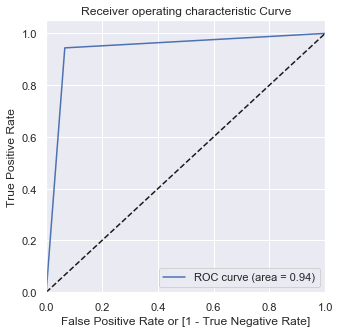

In [61]:
## Plot the sns curve 
sns.set(font_scale=1)
#fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final['diagnosis'],y_train_pred_final['predicted diagnosis'],drop_intermediate=False)
draw_roc(y_train_pred_final['diagnosis'],y_train_pred_final['predicted diagnosis'])

AUC =  0.94, which seems to be very good

<b> Accuracy : 94%
    Sensitivity : 94%
    Specificity: 93% <b>

### Execute the model on test data

In [68]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

400    9.996573e-01
225    8.226404e-01
321    9.524385e-01
173    7.468915e-08
506    9.987636e-02
380    1.742811e-01
197    6.481968e-01
260    9.999782e-01
40     3.691248e-01
160    8.057743e-01
dtype: float64

In [69]:
y_test_pred=y_test_pred.values.reshape(-1)

In [70]:
y_test_pred_final=pd.DataFrame({'id':y_test.index,'diagnosis':y_test.values,'diagnosis_prob':y_test_pred})

In [71]:
y_test_pred_final.head()

,id,diagnosis,diagnosis_prob
0,400,1,9.996573e-01
1,225,0,8.226404e-01
2,321,1,9.524385e-01
3,173,0,7.468915e-08
4,506,0,9.987636e-02


In [72]:
y_test_pred_final['predicted diagnosis'] = y_test_pred_final.diagnosis_prob.apply(lambda x: 1 if x>=0.3 else 0)

y_test_pred_final

,id,diagnosis,diagnosis_prob,predicted diagnosis
0,400,1,9.996573e-01,1
1,225,0,8.226404e-01,1
2,321,1,9.524385e-01,1
3,173,0,7.468915e-08,0
4,506,0,9.987636e-02,0
5,380,0,1.742811e-01,0
6,197,1,6.481968e-01,1
7,260,1,9.999782e-01,1
8,40,1,3.691248e-01,1
9,160,0,8.057743e-01,1


In [76]:
confusion_matrix_test=metrics.confusion_matrix(y_test_pred_final['diagnosis'],y_test_pred_final['predicted diagnosis'])

In [77]:
confusion_matrix_test

array([[92, 10],
       [ 5, 64]])

In [78]:
TP = confusion_matrix_test[1,1]
TN = confusion_matrix_test[0,0]
FP = confusion_matrix_test[0,1]
FN = confusion_matrix_test[1,0]

In [79]:
Accuracy = (TP + TN)/(TP+TN+FP+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)

In [81]:
print(round(Accuracy,2))
print(round(Sensitivity,2))
print(round(Specificity,2))

0.91
0.93
0.9


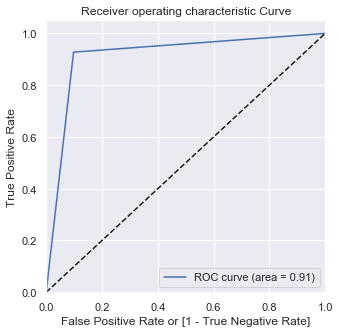

In [82]:
## Plot the sns curve 
sns.set(font_scale=1)
#fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final['diagnosis'],y_train_pred_final['predicted diagnosis'],drop_intermediate=False)
draw_roc(y_test_pred_final['diagnosis'],y_test_pred_final['predicted diagnosis'])

## So we can see that overall predictibility is good here and we have an accuracy over 91%